In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pickle

In [2]:
df_feat = pd.read_csv('../encoded data/opamps-features.csv')
df_ref = pd.read_csv('../encoded data/opamps-xref.csv')

In [3]:
df_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004970 entries, 0 to 1004969
Data columns (total 5 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   STMicro MPN           1004970 non-null  object
 1   STMicro Name          1004970 non-null  object
 2   Competitor MPN        1004970 non-null  object
 3   Competitor Name       1004970 non-null  object
 4   Cross Reference Type  1004970 non-null  object
dtypes: object(5)
memory usage: 38.3+ MB


In [4]:
df_feat.head()

MPN MANUFACTURER  Maximum Input Offset Voltage  \
0  PN-100       MN-103                      0.000200   
1  PN-101       MN-103                      0.000200   
2  PN-102      MN-1036                      0.000036   
3  PN-103      MN-1036                      0.004000   
4  PN-104      MN-1036                      0.005000   

   Maximum Single Supply Voltage  Minimum Single Supply Voltage  \
0                           36.0                            2.0   
1                           36.0                            2.0   
2                            5.0                            2.7   
3                            5.0                            2.7   
4                           32.0                            3.0   

   Number of Channels per Chip Supplier_Package  \
0                          4.0             CDIP   
1                          4.0            CFPAK   
2                          2.0            CSOIC   
3                          1.0            CFPAK   
4                          4.0             CDIP   

   Typical Gain Bandwidth Product  
0                    4.814442e+07  
1                    4.814442e+07  
2                    3.000000e+06  
3                    1.000000e+09  
4                    1.200000e+06

In [5]:
categorical_columns = ["Supplier_Package"]

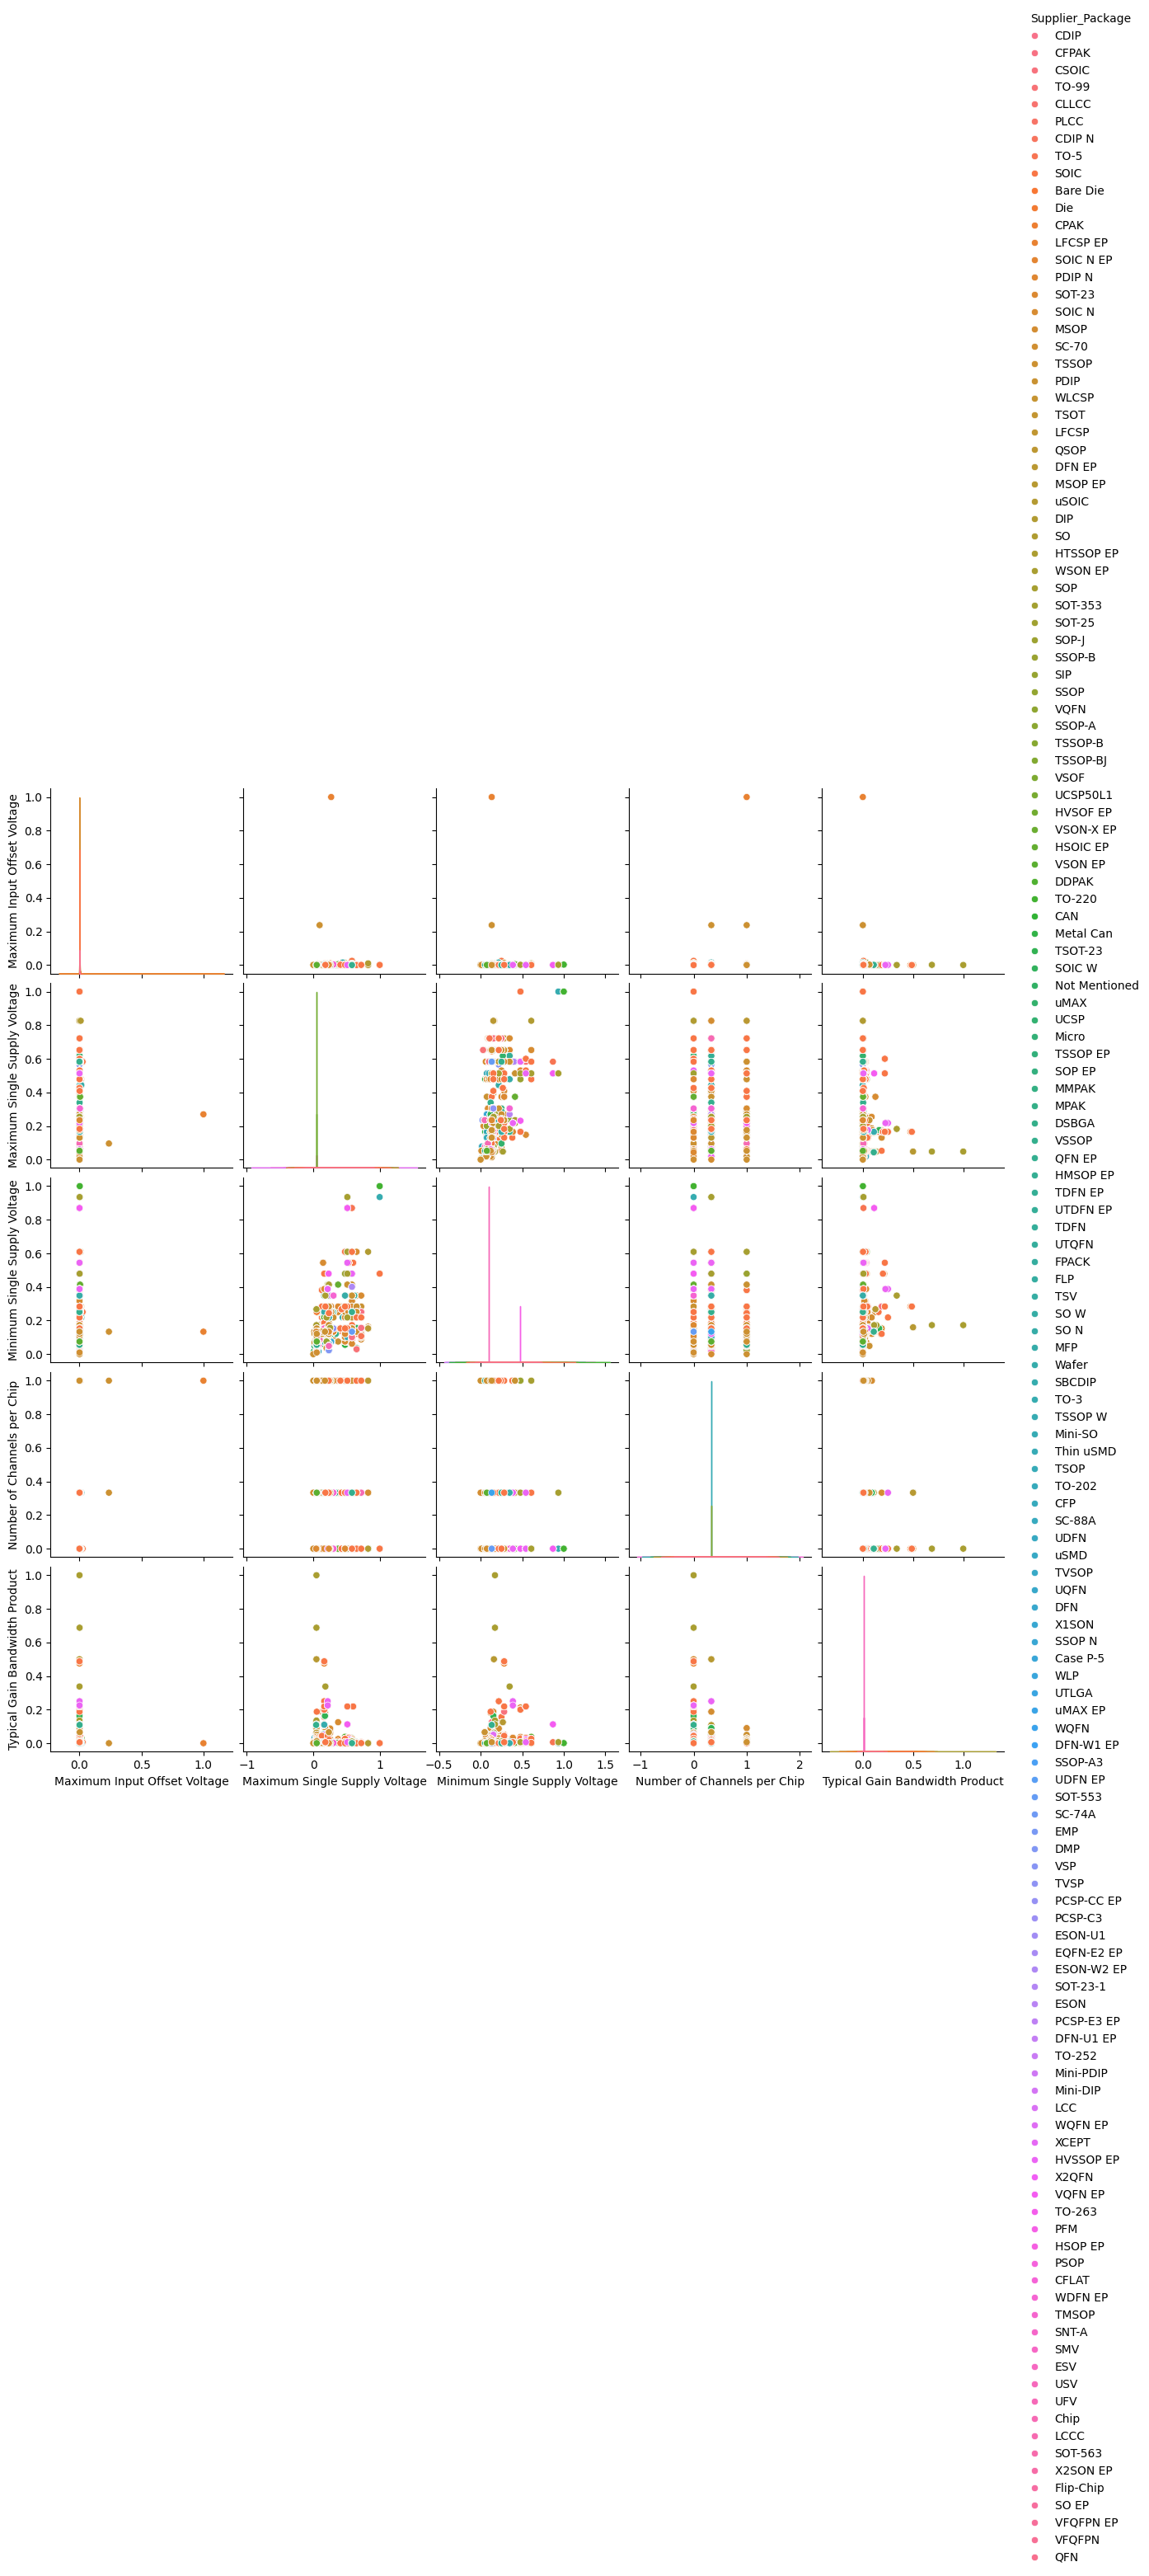

In [6]:
numerical_columns = ["Maximum Input Offset Voltage","Maximum Single Supply Voltage","Minimum Single Supply Voltage","Number of Channels per Chip","Typical Gain Bandwidth Product"]
scaler = MinMaxScaler()
df_feat[numerical_columns] = scaler.fit_transform(df_feat[numerical_columns] )
sns.pairplot(df_feat[numerical_columns + ["Supplier_Package"]],hue="Supplier_Package")
plt.show()

In [7]:
df_stm = df_ref.merge(df_feat , left_on=["STMicro MPN","STMicro Name"], right_on=["MPN",	"MANUFACTURER"	])
df_merged = df_stm.merge(df_feat , left_on=["Competitor MPN","Competitor Name"], right_on=["MPN",	"MANUFACTURER"	], suffixes = ("","_comp") )
df_merged.drop(columns=["STMicro MPN","STMicro Name", "Competitor MPN","Competitor Name"],inplace = True)
df_merged.head()

Cross Reference Type         MPN MANUFACTURER  Maximum Input Offset Voltage  \
0                    A  PN-1017594      MN-1030                        0.0005   
1                    A  PN-1017602      MN-1030                        0.0010   
2                    A  PN-1017602      MN-1030                        0.0010   
3                    A  PN-1017594      MN-1030                        0.0005   
4                    A  PN-1017602      MN-1030                        0.0010   

   Maximum Single Supply Voltage  Minimum Single Supply Voltage  \
0                       0.478261                       0.153094   
1                       0.478261                       0.153094   
2                       0.478261                       0.153094   
3                       0.478261                       0.153094   
4                       0.478261                       0.153094   

   Number of Channels per Chip Supplier_Package  \
0                          0.0           SOT-23   
1                          0.0           SOT-23   
2                          0.0           SOT-23   
3                          0.0           SOT-23   
4                          0.0           SOT-23   

   Typical Gain Bandwidth Product    MPN_comp MANUFACTURER_comp  \
0                          0.0001  PN-1017599           MN-1036   
1                          0.0001  PN-1017598           MN-1036   
2                          0.0001  PN-1017597           MN-1036   
3                          0.0001  PN-1017598           MN-1036   
4                          0.0001  PN-1017599           MN-1036   

   Maximum Input Offset Voltage_comp  Maximum Single Supply Voltage_comp  \
0                              0.001                            0.478261   
1                              0.001                            0.478261   
2                              0.001                            0.478261   
3                              0.001                            0.478261   
4                              0.001                            0.478261   

   Minimum Single Supply Voltage_comp  Number of Channels per Chip_comp  \
0                            0.153094                               0.0   
1                            0.153094                               0.0   
2                            0.153094                               0.0   
3                            0.153094                               0.0   
4                            0.153094                               0.0   

  Supplier_Package_comp  Typical Gain Bandwidth Product_comp  
0                SOT-23                               0.0001  
1                SOT-23                               0.0001  
2                SOT-23                               0.0001  
3                SOT-23                               0.0001  
4                SOT-23                               0.0001

In [8]:
df_merged["Cross Reference Type"].value_counts()

Cross Reference Type
D              808455
C              158650
B               36764
C/Upgrade         465
C/Downgrade       336
B/Downgrade       114
B/Upgrade          48
A                   8
SF                  7
Name: count, dtype: int64

In [9]:
test  = df_feat.merge(df_feat, on=["MPN",	"MANUFACTURER"],suffixes = ("","_comp"))
test["MPN_comp"]= test["MPN"]
test["MANUFACTURER_comp"]= test["MANUFACTURER"]
test["Cross Reference Type"] = "A"
test = test.reindex(['Cross Reference Type', 'MPN', 'MANUFACTURER',
       'Maximum Input Offset Voltage', 'Maximum Single Supply Voltage',
       'Minimum Single Supply Voltage', 'Number of Channels per Chip',
       'Supplier_Package', 'Typical Gain Bandwidth Product', 'MPN_comp',
       'MANUFACTURER_comp', 'Maximum Input Offset Voltage_comp',
       'Maximum Single Supply Voltage_comp',
       'Minimum Single Supply Voltage_comp',
       'Number of Channels per Chip_comp', 'Supplier_Package_comp',
       'Typical Gain Bandwidth Product_comp'],axis=1)
test['Cross Reference Type'].value_counts()

Cross Reference Type
A    18352
Name: count, dtype: int64

In [10]:
df_merged = pd.concat([df_merged,test])
df_merged["Cross Reference Type"].value_counts()

Cross Reference Type
D              808455
C              158650
B               36764
A               18360
C/Upgrade         465
C/Downgrade       336
B/Downgrade       114
B/Upgrade          48
SF                  7
Name: count, dtype: int64

In [11]:
df_merged["Cross Reference Type"] = df_merged["Cross Reference Type"].replace("B/Downgrade","B")
df_merged["Cross Reference Type"] = df_merged["Cross Reference Type"].replace("B/Upgrade","B")
df_merged["Cross Reference Type"] = df_merged["Cross Reference Type"].replace("C/Downgrade","C")
df_merged["Cross Reference Type"] = df_merged["Cross Reference Type"].replace("C/Upgrade","C")

In [12]:
df_merged["Cross Reference Type"].value_counts()
df_filtered = df_merged[~df_merged["Cross Reference Type"].isin(["SF"])] # à rectifier avec l'equipe de données
df_filtered["Cross Reference Type"].value_counts()

Cross Reference Type
D    808455
C    159451
B     36926
A     18360
Name: count, dtype: int64

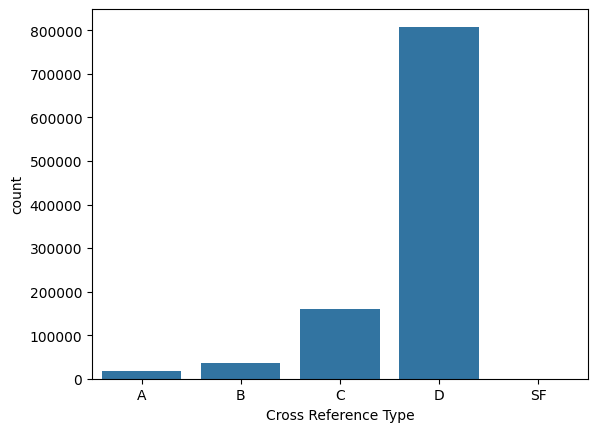

In [13]:
sns.countplot(df_merged, x="Cross Reference Type")
plt.show()

In [14]:
class_A = df_filtered[df_filtered["Cross Reference Type"] == "A"]
class_B = df_filtered[df_filtered["Cross Reference Type"].isin(["B"])]
class_C = df_filtered[df_filtered["Cross Reference Type"].isin(["C"])]
class_D = df_filtered[df_filtered["Cross Reference Type"].isin(["D"])]
#n= 36926
n= 100000
random_state = 42

In [15]:
class_B_downsampled = class_B.sample(n=n, random_state=random_state,replace=True)
class_C_downsampled = class_C.sample(n=n,random_state=random_state)
class_A_oversampled = class_A.sample(n=n,random_state=random_state, replace= True)
class_D_downsampled = class_D.sample(n=n,random_state=random_state)

In [16]:
df_sampled = pd.concat([class_A_oversampled, class_B_downsampled, class_C_downsampled,class_D_downsampled],axis=  0)

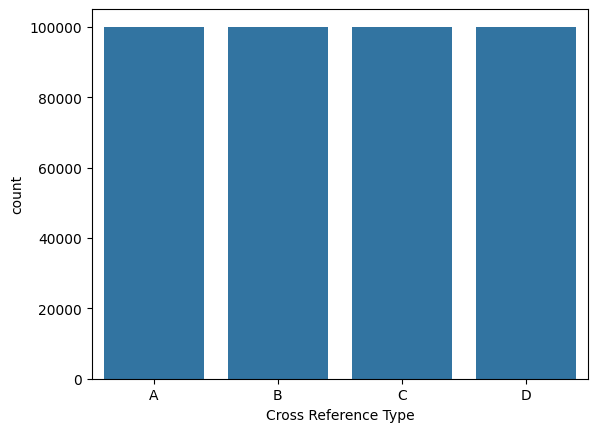

In [17]:
sns.countplot(df_sampled, x="Cross Reference Type")
plt.show()

In [18]:

from scipy.stats import norm
base_means = {
    'A': 0.96,
    'B': 0.84,
   # 'C': 0.71,
   'C': 0.65,
    #'D':0.59 # 0.55, 0.65
    'D':0.5
}
base_std={
    'A': 0.0107,
    'B': 0.0249,
    'C': 0.01779,
    'D': 0.01779
}
interval= {
    "A":(0.93,1),
    "B": (0.77,0.92),
    #"C":(0.66,0.76),
    "C":(0.60,0.71),
    #"D":(0.55,0.65)
    "D":(0.44,0.56)
}
def get_params(category):
    parts = category.split('/')
    
    mean = base_means.get(parts[0], 0.0)
    std = base_std.get(parts[0], 0.0)
    return mean, std
df_sampled["Mean"] , df_sampled["Std"] = zip(*df_sampled["Cross Reference Type"].map(get_params))
df_sampled['Closeness'] = df_sampled.apply(lambda row: norm.rvs(loc=row['Mean'], scale=row['Std']), axis=1)
df_sampled['Closeness'] = df_sampled['Closeness'].clip(0, 1)
for classe in interval:
    df_sampled.loc[df_sampled["Cross Reference Type"]==classe, "Closeness"] = df_sampled.loc[df_sampled["Cross Reference Type"]==classe, "Closeness"].clip(*interval[classe])


<Axes: xlabel='Closeness', ylabel='Density'>

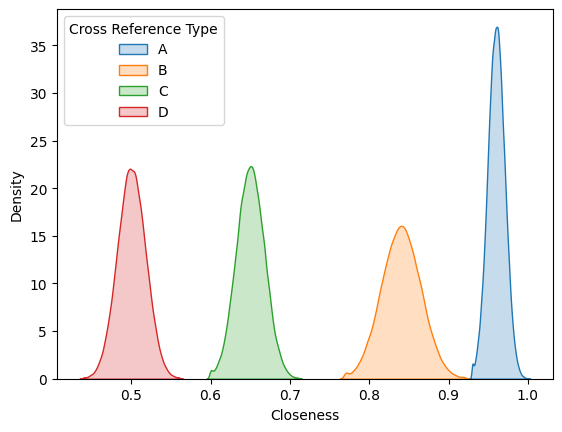

In [19]:
sns.kdeplot(data=df_sampled, x='Closeness', hue='Cross Reference Type', fill=True, common_norm=False)


In [20]:
df_sampled.head()

Cross Reference Type         MPN MANUFACTURER  \
15787                    A  PN-1015754      MN-1036   
852                      A    PN-10852       MN-103   
5382                     A   PN-105355      MN-1036   
11956                    A  PN-1011923      MN-1023   
11276                    A  PN-1011243      MN-1039   

       Maximum Input Offset Voltage  Maximum Single Supply Voltage  \
15787                      0.000500                       0.234783   
852                        0.000015                       0.043478   
5382                       0.000003                       0.019130   
11956                      0.002500                       0.052174   
11276                      0.000875                       0.052174   

       Minimum Single Supply Voltage  Number of Channels per Chip  \
15787                       0.153094                     0.333333   
852                         0.133550                     0.333333   
5382                        0.068404                     0.000000   
11956                       0.022801                     0.000000   
11276                       0.074919                     0.000000   

      Supplier_Package  Typical Gain Bandwidth Product    MPN_comp  \
15787             SOIC                    2.122501e-04  PN-1015754   
852               MSOP                    2.999751e-03    PN-10852   
5382            SOT-23                    7.500002e-07   PN-105355   
11956           SOT-23                    1.247500e-04  PN-1011923   
11276           SC-88A                    3.747501e-04  PN-1011243   

      MANUFACTURER_comp  Maximum Input Offset Voltage_comp  \
15787           MN-1036                           0.000500   
852              MN-103                           0.000015   
5382            MN-1036                           0.000003   
11956           MN-1023                           0.002500   
11276           MN-1039                           0.000875   

       Maximum Single Supply Voltage_comp  Minimum Single Supply Voltage_comp  \
15787                            0.234783                            0.153094   
852                              0.043478                            0.133550   
5382                             0.019130                            0.068404   
11956                            0.052174                            0.022801   
11276                            0.052174                            0.074919   

       Number of Channels per Chip_comp Supplier_Package_comp  \
15787                          0.333333                  SOIC   
852                            0.333333                  MSOP   
5382                           0.000000                SOT-23   
11956                          0.000000                SOT-23   
11276                          0.000000                SC-88A   

       Typical Gain Bandwidth Product_comp  Mean     Std  Closeness  
15787                         2.122501e-04  0.96  0.0107   0.935732  
852                           2.999751e-03  0.96  0.0107   0.952535  
5382                          7.500002e-07  0.96  0.0107   0.974240  
11956                         1.247500e-04  0.96  0.0107   0.954318  
11276                         3.747501e-04  0.96  0.0107   0.960723

In [21]:
for col in numerical_columns: 
    name = col+"_diff"
    df_sampled[name] = np.abs(df_sampled[col]-df_sampled[col+"_comp"])
categorical_columns = ["Supplier_Package"]
for col in categorical_columns: 
    name = col+"_diff"
    df_sampled[name] = np.where(df_sampled[col] == df_sampled[col+"_comp"], 0, 1)#amb
df_sampled.iloc[50000:50005]

Cross Reference Type         MPN MANUFACTURER  \
12872                    A  PN-1012839      MN-1036   
12059                    A  PN-1012026      MN-1023   
5471                     A   PN-105443       MN-103   
14256                    A  PN-1014223      MN-1025   
3378                     A   PN-103371      MN-1030   

       Maximum Input Offset Voltage  Maximum Single Supply Voltage  \
12872                      0.000037                       0.582609   
12059                      0.000500                       0.234783   
5471                       0.000112                       0.721739   
14256                      0.001500                       0.052174   
3378                       0.000500                       0.478261   

       Minimum Single Supply Voltage  Number of Channels per Chip  \
12872                       0.250814                     0.333333   
12059                       0.022801                     1.000000   
5471                        0.218241                     1.000000   
14256                       0.120521                     0.333333   
3378                        0.153094                     0.333333   

      Supplier_Package  Typical Gain Bandwidth Product    MPN_comp  ...  \
12872             SOIC                        0.000687  PN-1012839  ...   
12059              DMP                        0.000012  PN-1012026  ...   
5471            PDIP N                        0.000100   PN-105443  ...   
14256            TSSOP                        0.000750  PN-1014223  ...   
3378              SO N                        0.000137   PN-103371  ...   

      Typical Gain Bandwidth Product_comp  Mean     Std  Closeness  \
12872                            0.000687  0.96  0.0107   0.965636   
12059                            0.000012  0.96  0.0107   0.959163   
5471                             0.000100  0.96  0.0107   0.972100   
14256                            0.000750  0.96  0.0107   0.955344   
3378                             0.000137  0.96  0.0107   0.961230   

       Maximum Input Offset Voltage_diff Maximum Single Supply Voltage_diff  \
12872                                0.0                                0.0   
12059                                0.0                                0.0   
5471                                 0.0                                0.0   
14256                                0.0                                0.0   
3378                                 0.0                                0.0   

       Minimum Single Supply Voltage_diff  Number of Channels per Chip_diff  \
12872                                 0.0                               0.0   
12059                                 0.0                               0.0   
5471                                  0.0                               0.0   
14256                                 0.0                               0.0   
3378                                  0.0                               0.0   

       Typical Gain Bandwidth Product_diff  Supplier_Package_diff  
12872                                  0.0                      0  
12059                                  0.0                      0  
5471                                   0.0                      0  
14256                                  0.0                      0  
3378                                   0.0                      0  

[5 rows x 26 columns]

In [22]:
df_sampled.to_csv('df_sampled.csv', index=False)

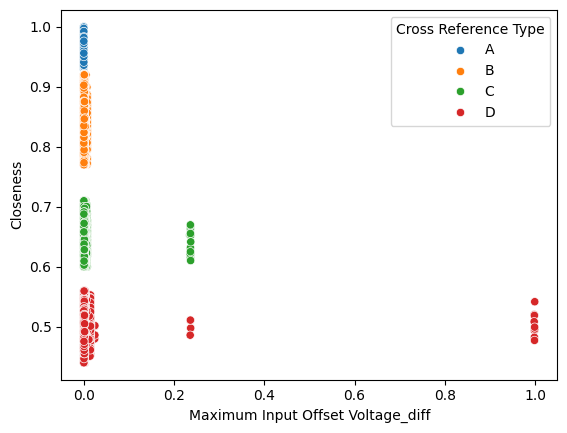

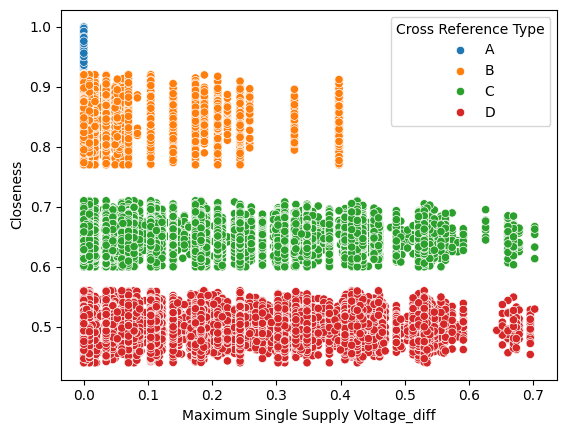

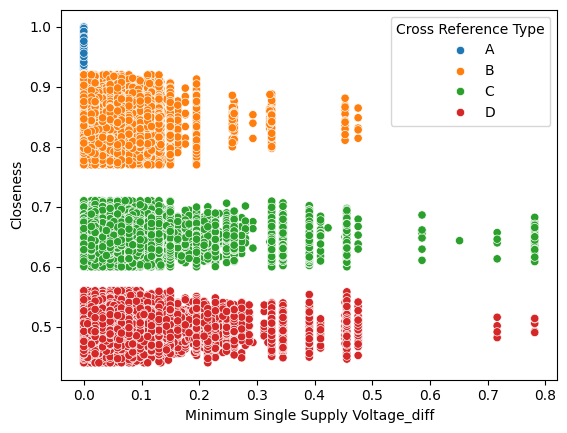

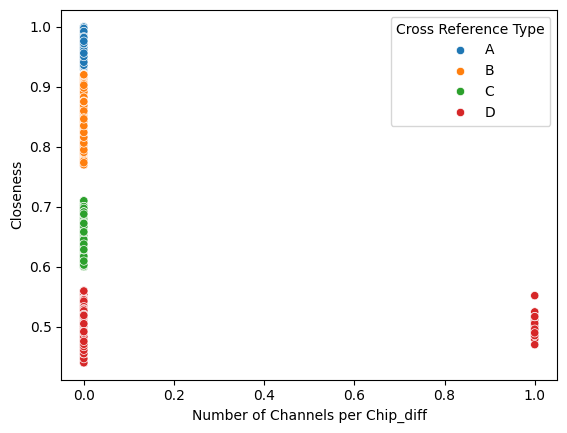

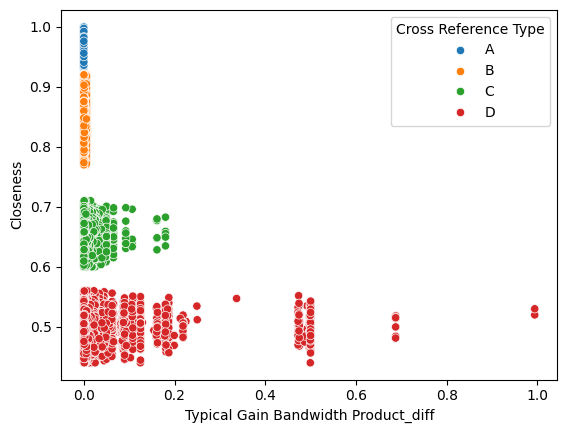

C:\Users\adamg\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


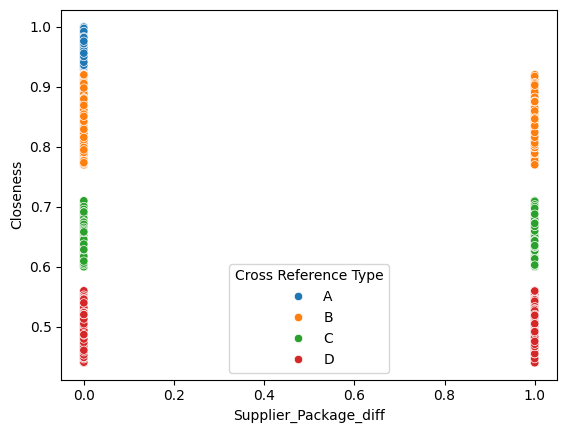

In [23]:
columns_diff = [col+"_diff" for col in numerical_columns+categorical_columns]
for col in columns_diff:
    sns.scatterplot(df_sampled[columns_diff+["Closeness","Cross Reference Type"]],x=col, y="Closeness", hue="Cross Reference Type")
    plt.show()

In [24]:
from sklearn.model_selection import train_test_split
def split_dataframe(df, train_percent=0.8, validate_percent=0.1, test_percent=0.1, random_state=42, stratify_col="Cross Reference Type"):
    assert train_percent + validate_percent + test_percent == 1, "Split percentages must sum to 1."

    # First split: Train and Temp (Validate + Test)
    train_df, temp_df = train_test_split(
        df,
        test_size=(validate_percent + test_percent),
        stratify=df[stratify_col],
        random_state=random_state
    )
    
    # Calculate the proportion of validation and test from the Temp split
    if validate_percent==0:
        return train_df,pd.DataFrame(columns=df.columns), temp_df
    test_size = test_percent / (validate_percent + test_percent)
    
    # Second split: Validate and Test
    validate_df, test_df = train_test_split(
        temp_df,
        test_size=test_size,
        stratify=temp_df[stratify_col],
        random_state=random_state
    )
    
    return train_df, validate_df, test_df

In [25]:
test  = df_feat.merge(df_feat, on=["MPN",	"MANUFACTURER"],suffixes = ("","_comp"))
test["MPN_comp"]= test["MPN"]
test["MANUFACTURER_comp"]= test["MANUFACTURER"]
test["Cross Reference Type"] = "A"
test = test.reindex(['Cross Reference Type', 'MPN', 'MANUFACTURER',
       'Maximum Input Offset Voltage', 'Maximum Single Supply Voltage',
       'Minimum Single Supply Voltage', 'Number of Channels per Chip',
       'Supplier_Package', 'Typical Gain Bandwidth Product', 'MPN_comp',
       'MANUFACTURER_comp', 'Maximum Input Offset Voltage_comp',
       'Maximum Single Supply Voltage_comp',
       'Minimum Single Supply Voltage_comp',
       'Number of Channels per Chip_comp', 'Supplier_Package_comp',
       'Typical Gain Bandwidth Product_comp'],axis=1)
test['Cross Reference Type'].value_counts()

Cross Reference Type
A    18352
Name: count, dtype: int64

In [117]:

import itertools
import plotly.express as px
import plotly.io as pio
# Assume df_combined is your DataFrame containing the necessary columns
# Example:
# df_combined = pd.read_csv('combined_dataframe.csv')

# Define the columns to create unique pairs
columns = [
    'Maximum Input Offset Voltage_diff',
    'Maximum Single Supply Voltage_diff',
    'Minimum Single Supply Voltage_diff',
    'Number of Channels per Chip_diff',
    'Typical Gain Bandwidth Product_diff',
    'Supplier_Package_diff'
]

# Identify numerical columns excluding 'Closeness'

# Generate all possible pairs of numerical columns
column_pairs = list(itertools.combinations(columns_diff, 2))

# Generate a color palette based on 'Cross Reference Type'
unique_types = df_sampled['Cross Reference Type'].unique()

# Create 3D scatter plots for each pair
for x_col, y_col in column_pairs:
    #fig = plt.figure()
    fig = px.scatter_3d(df_sampled, x_col, y_col, 'Closeness', color='Cross Reference Type',opacity=0.7)
    pio.write_html(fig , file= f'{x_col}_vs_{y_col}_vs_Closeness.html')
    #plt.title(f'3D Scatter Plot: {x_col} vs {y_col} vs Closeness')



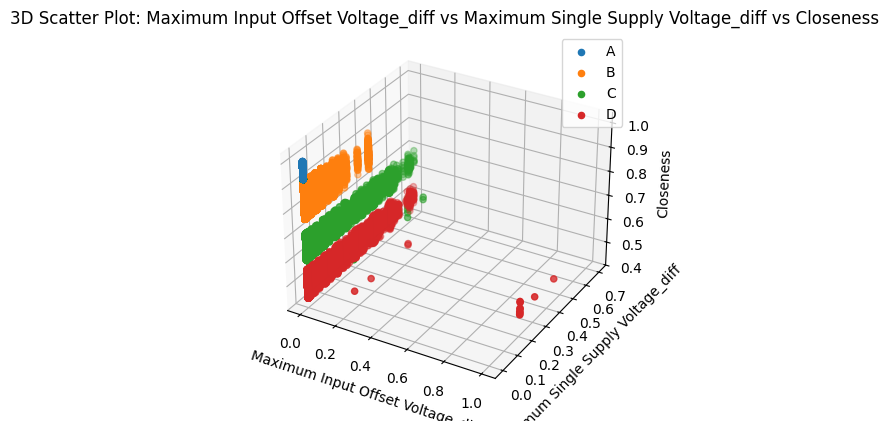

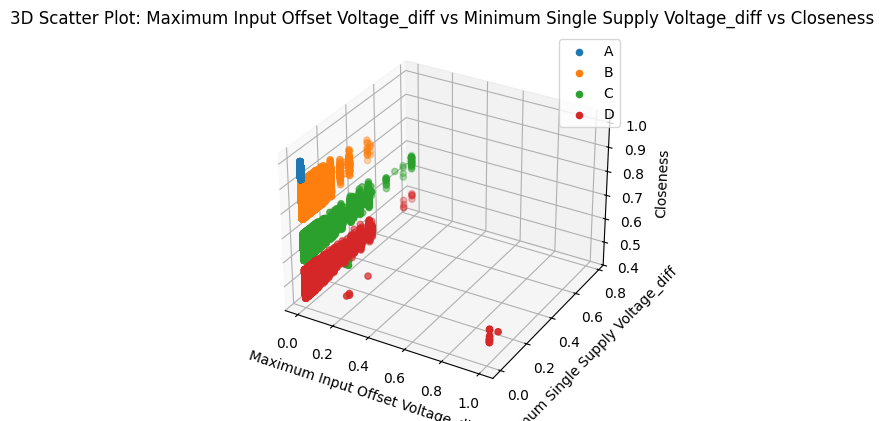

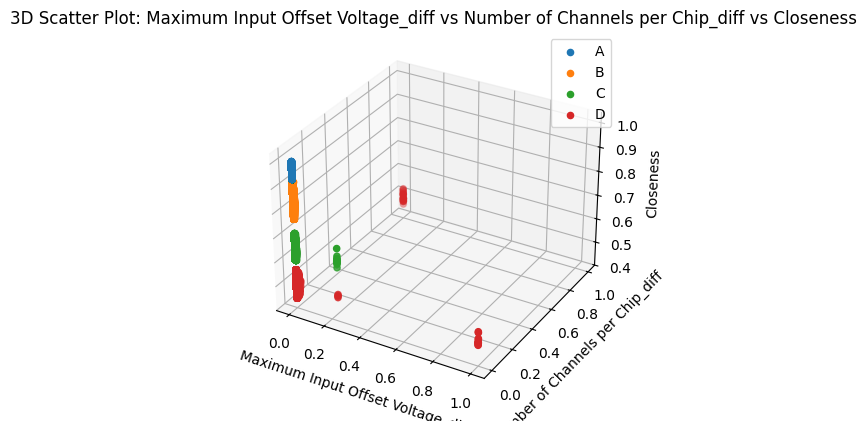

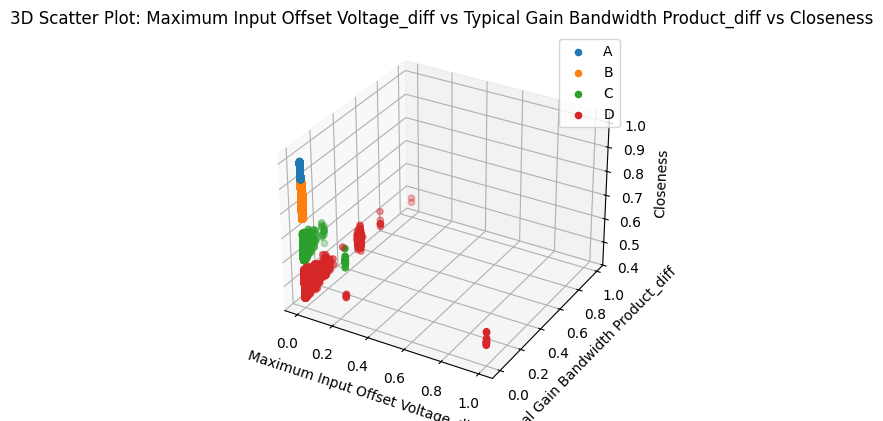

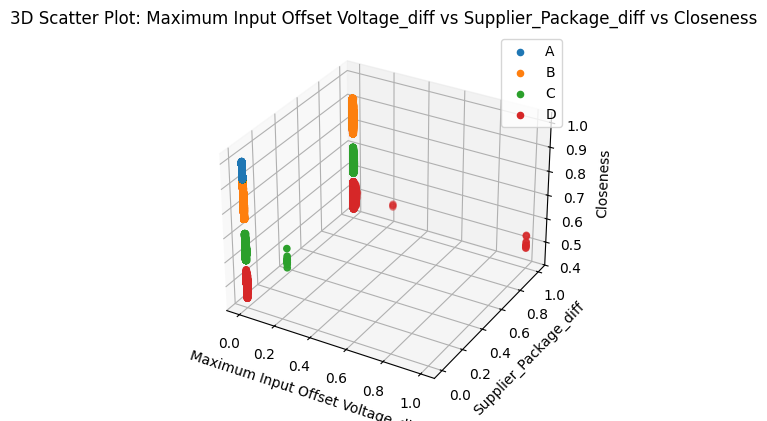

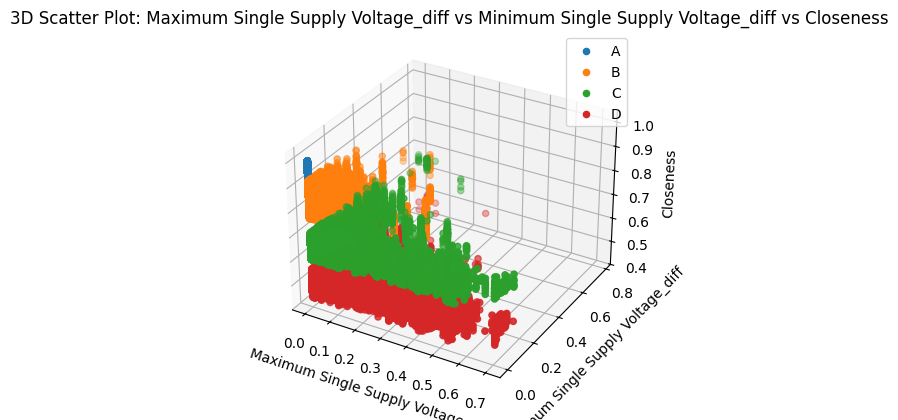

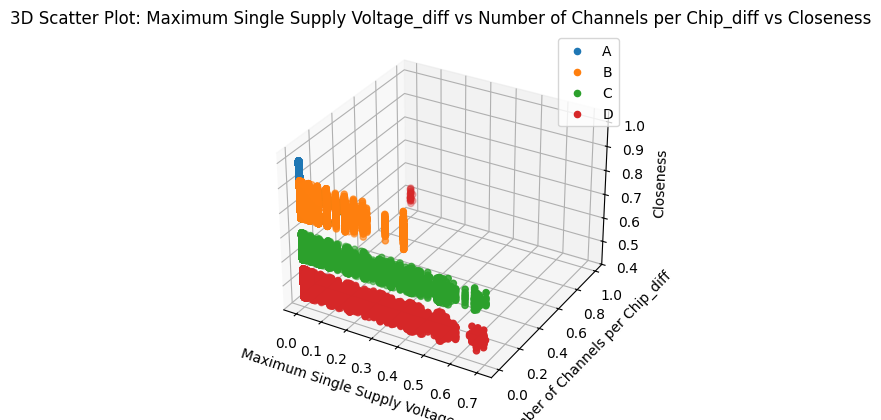

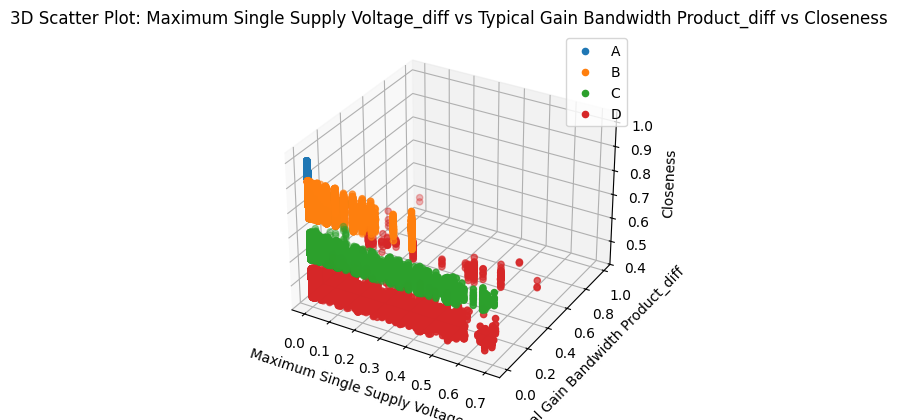

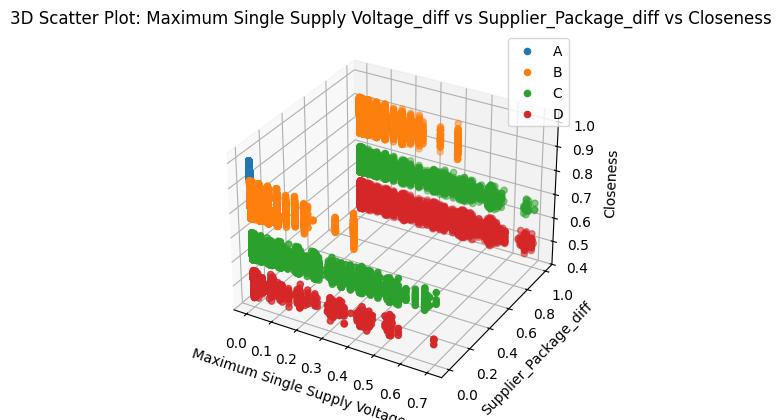

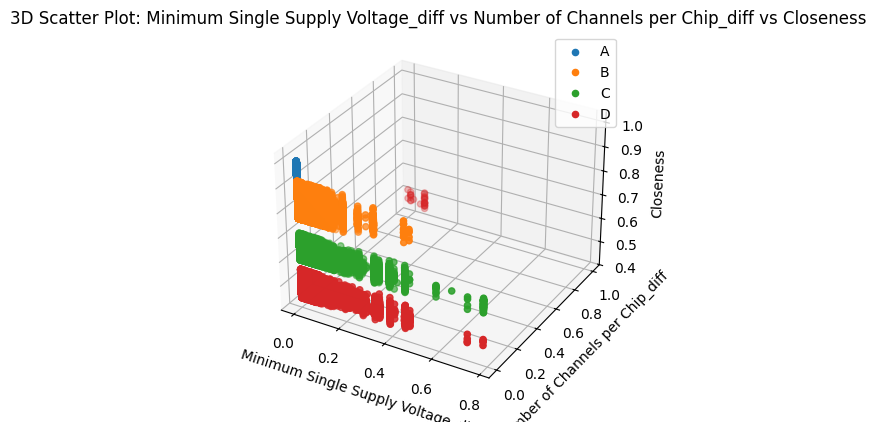

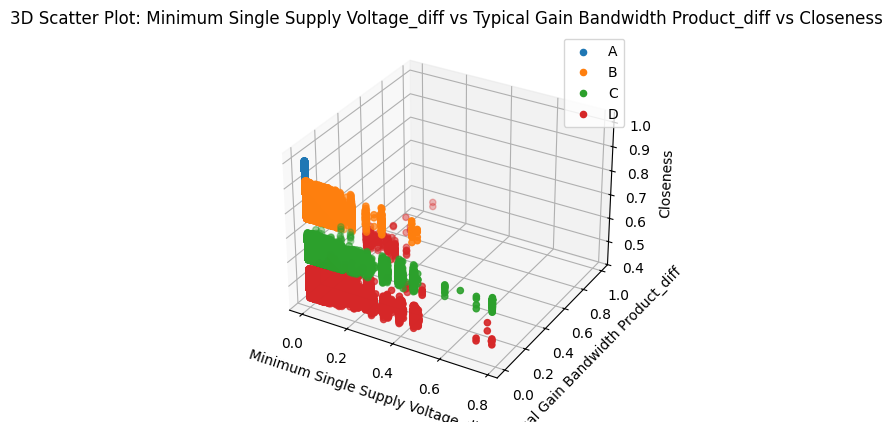

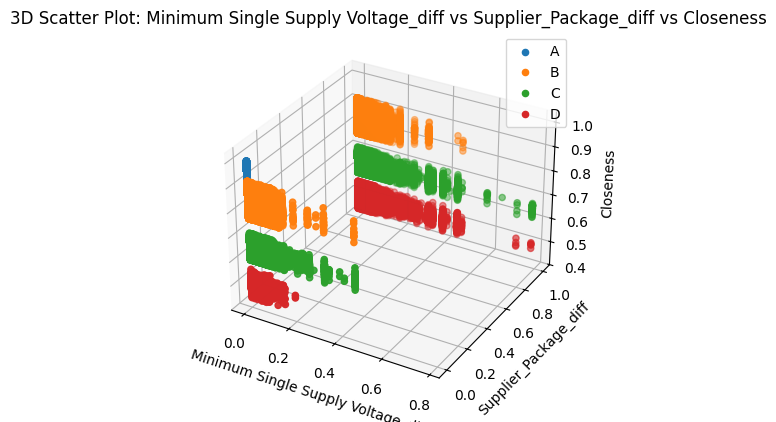

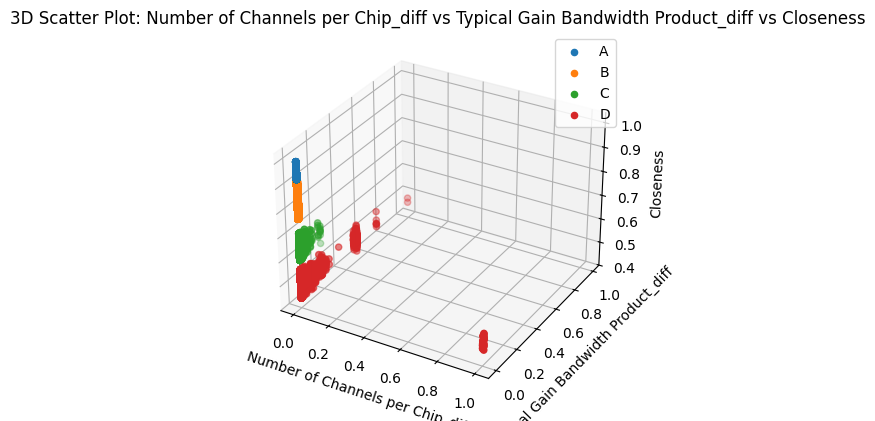

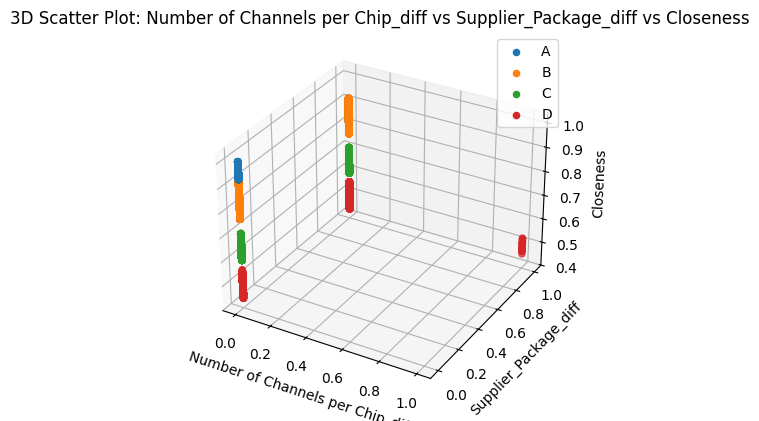

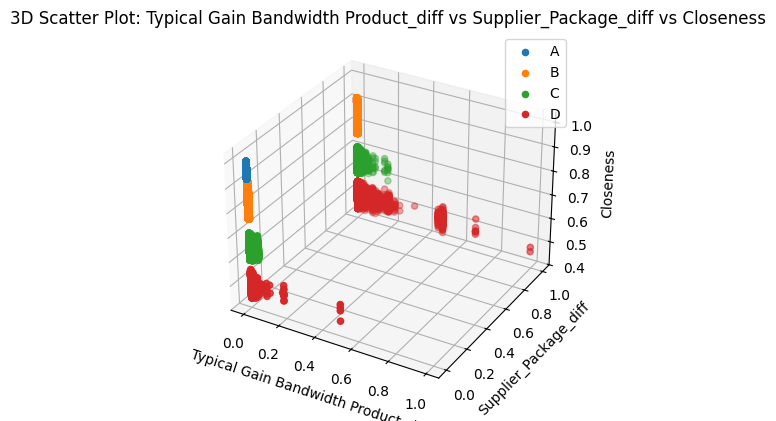

In [118]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
import seaborn as sns

# Identify numerical columns excluding 'Closeness'

# Generate all possible pairs of numerical columns
column_pairs = list(itertools.combinations(columns_diff, 2))

# Generate a color palette based on 'Cross Reference Type'
unique_types = df_sampled['Cross Reference Type'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_types))
color_dict = dict(zip(unique_types, palette))

# Create 3D scatter plots for each pair
for x_col, y_col in column_pairs:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for ctype in unique_types:
        subset = df_sampled[df_sampled['Cross Reference Type'] == ctype]
        ax.scatter(
            subset[x_col],
            subset[y_col],
            subset['Closeness'],
            color=color_dict[ctype],
            label=ctype,
            marker='o'
        )
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel('Closeness')
    plt.title(f'3D Scatter Plot: {x_col} vs {y_col} vs Closeness')
    plt.legend()
    plt.show()

In [29]:
df_train["Supplier_Package_diff"]

1943      0
132623    1
15893     0
11129     0
17384     0
         ..
159423    1
22152     1
166873    0
101778    0
732461    1
Name: Supplier_Package_diff, Length: 360000, dtype: int32

In [32]:
categorical_columns

['Supplier_Package']

In [33]:
df_train , df_val, df_test = split_dataframe(df_sampled,0.9,0,0.1)
X_train = df_train[numerical_columns+["Supplier_Package_diff"]]
y_train = df_train["Closeness"]
X_val = df_val[numerical_columns+["Supplier_Package_diff"]]
y_val = df_val["Closeness"]
X_test = df_test[numerical_columns+["Supplier_Package_diff"]]
y_test = df_test["Closeness"]

In [34]:
X_train

Maximum Input Offset Voltage  Maximum Single Supply Voltage  \
1943                    5.000000e-04                       0.130435   
132623                  3.750000e-04                       0.052174   
15893                   5.000000e-04                       0.234783   
11129                   5.000000e-07                       0.052174   
17384                   7.500000e-04                       0.052174   
...                              ...                            ...   
159423                  1.000000e-04                       0.052174   
22152                   2.000000e-04                       0.052174   
166873                  1.000000e-04                       0.052174   
101778                  8.750000e-04                       0.052174   
732461                  1.000000e-03                       0.052174   

        Minimum Single Supply Voltage  Number of Channels per Chip  \
1943                         0.087948                     1.000000   
132623                       0.120521                     0.333333   
15893                        0.153094                     0.000000   
11129                        0.107492                     0.333333   
17384                        0.074919                     1.000000   
...                               ...                          ...   
159423                       0.120521                     0.333333   
22152                        0.120521                     1.000000   
166873                       0.120521                     1.000000   
101778                       0.120521                     1.000000   
732461                       0.107492                     0.000000   

        Typical Gain Bandwidth Product  Supplier_Package_diff  
1943                          0.000025                      0  
132623                        0.001000                      1  
15893                         0.000010                      0  
11129                         0.000250                      0  
17384                         0.001250                      0  
...                                ...                    ...  
159423                        0.000162                      1  
22152                         0.000687                      1  
166873                        0.000162                      0  
101778                        0.000687                      0  
732461                        0.000162                      1  

[360000 rows x 6 columns]

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import joblib


# Create the pipeline
pipeline = Pipeline(steps=[
    ('regressor', LinearRegression())
])

# Define hyperparameter grid
param_grid = {
    'regressor__fit_intercept': [True, False]
}
Best_parameters= {'regressor__fit_intercept': True}
# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best score
print("Best cross-validation MSE score:", -grid_search.best_score_)
# Best cross-validation MSE score: 0.030216958799108677
# Save the model
lr_model =grid_search.best_estimator_
joblib.dump(grid_search.best_estimator_, 'linear_regression_pipeline.pkl')

Best parameters: {'regressor__fit_intercept': True}
Best cross-validation MSE score: 0.01938102646147285


['linear_regression_pipeline.pkl']

In [38]:
model_accuracy ={}

In [36]:
from sklearn.metrics import mean_squared_error
def test_model(model):
    df = df_test.copy()
    y_pred = model.predict(X_test)
    df["Predicted Closeness"] =y_pred
    df["absolute_error"] = np.abs(df["Closeness"]-df["Predicted Closeness"])
    mse = mean_squared_error(y_test, y_pred)
    print(f"Test MSE: {mse:.4f}")
    
    hue_order=sorted(df["Cross Reference Type"].unique())
    sns.histplot(df[df["Predicted Closeness"]<=1], x='Predicted Closeness', hue='Cross Reference Type', bins=50, hue_order=hue_order)
    plt.show()
    
    sns.kdeplot(df[df["Predicted Closeness"]<=1], x='Predicted Closeness', hue='Cross Reference Type',fill=True, common_norm=False,hue_order=hue_order)
    plt.show()
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    cross_reference_types = df["Cross Reference Type"].unique()

    for ax, ctype in zip(axes.flatten(), cross_reference_types):
        sns.histplot(df[df["Cross Reference Type"] == ctype], x='Predicted Closeness', hue='Cross Reference Type', ax=ax)
        ax.set_title(f'Cross Reference Type: {ctype}')

    plt.tight_layout()
    plt.show()
    sns.barplot(data=df, hue='Cross Reference Type', x='absolute_error')
    plt.show()
    return mse


In [209]:

lr_model.named_steps['regressor'].coef_

array([ 0.06625057, -0.03550285,  0.50547402,  0.00080396,  0.79543066])

Test MSE: 0.0196


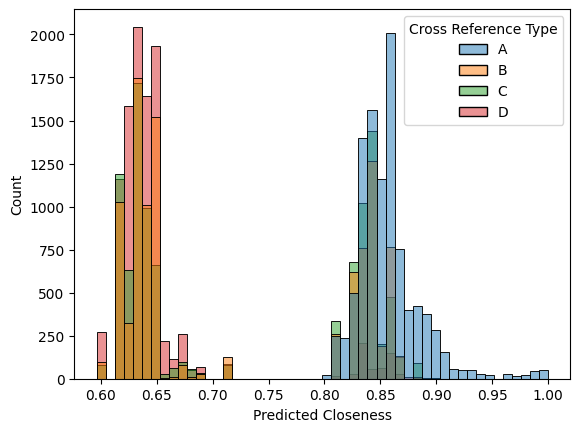

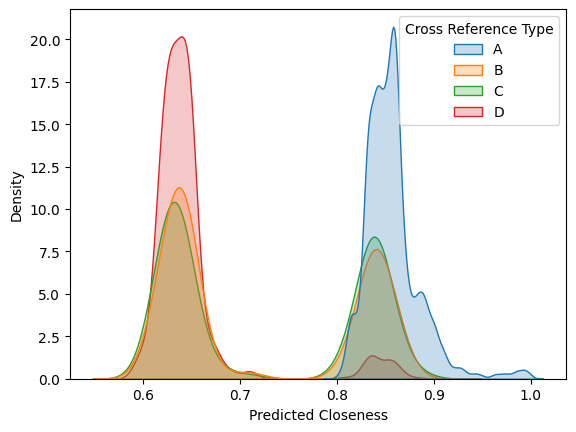

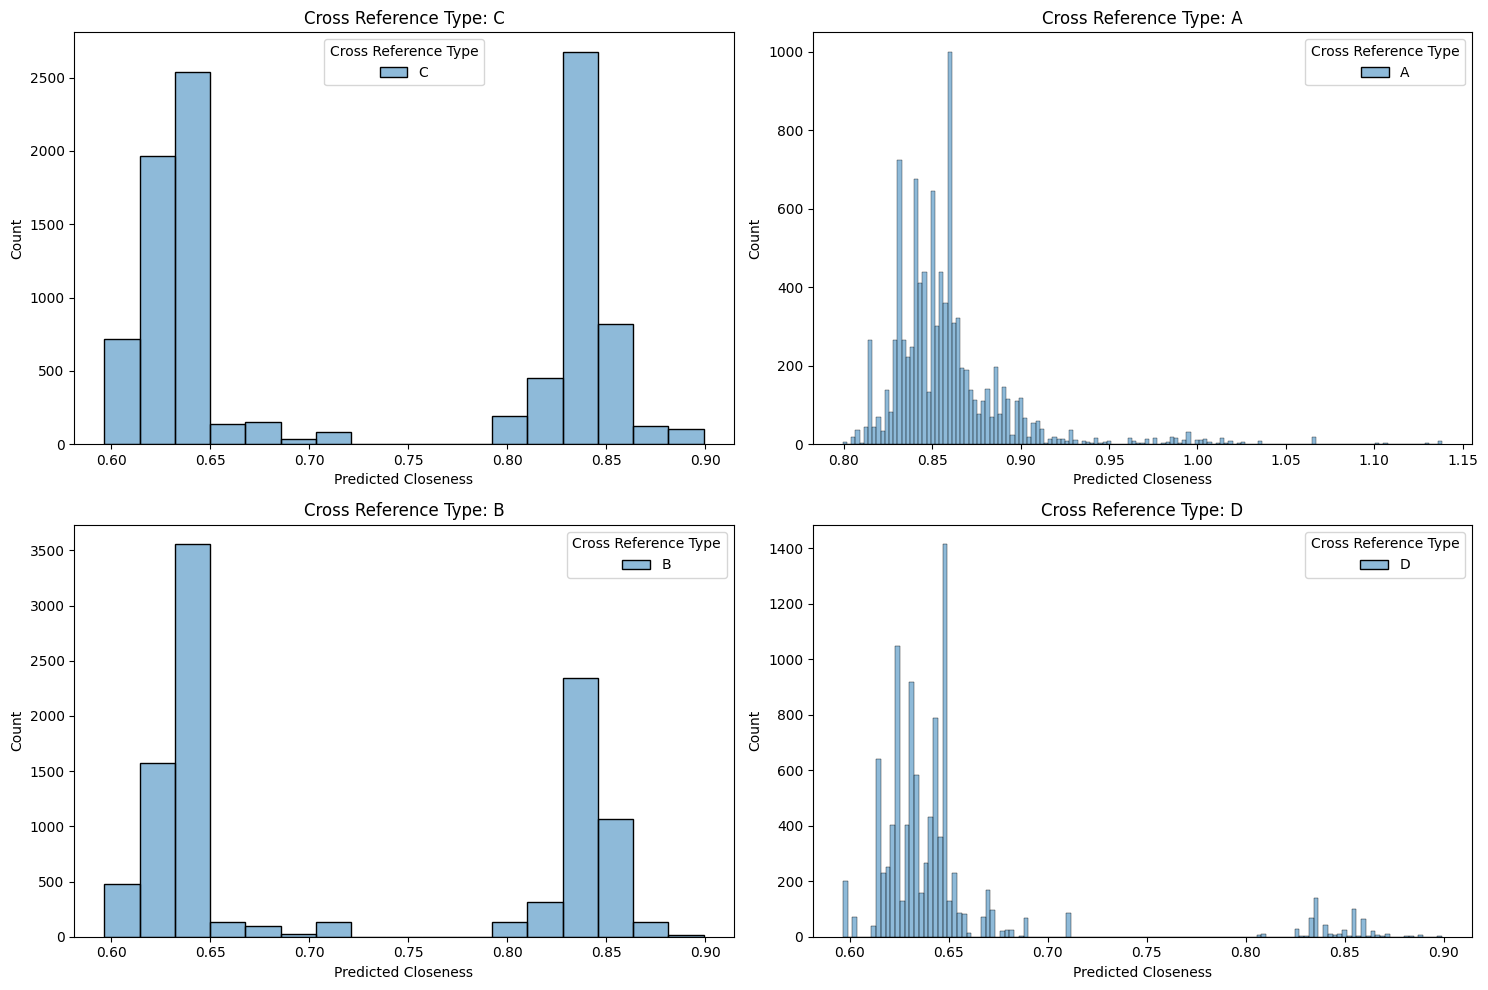

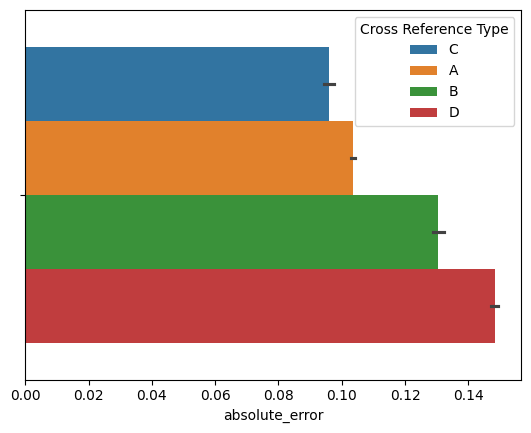

In [39]:
model_accuracy["Linear Regregression"]= test_model(lr_model)

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# Define target and features
# X = df_sampled[columns_diff] # Replace 'Closeness' with your target column if different
# y = df_sampled['Closeness']

# Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Preprocessing for numerical data
# numerical_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# # Preprocessing for categorical data
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, columns_diff),
#         ('cat', categorical_transformer, categorical_columns)
#     ])

# Create the pipeline
pipeline = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# Define hyperparameter grid
param_grid = {#default 
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}
best_param = {'regressor__max_depth': [20], 'regressor__min_samples_leaf': [1], 'regressor__min_samples_split': [5], 'regressor__n_estimators': [200]}
# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, best_param, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best score
print("Best cross-validation MSE score:", -grid_search.best_score_)
#print("Best cross-validation R2 score:", grid_search.best_score_)

# Save the model
joblib.dump(grid_search.best_estimator_, 'random_forest_regressor_pipeline.pkl')
rf_model = grid_search.best_estimator_

Best parameters: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
Best cross-validation MSE score: 0.011872452837694853


Test MSE: 0.0119


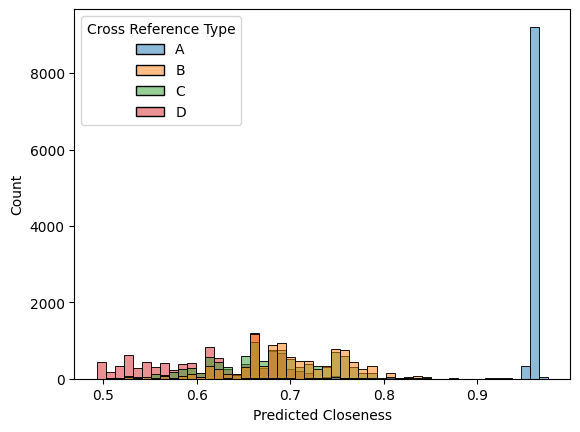

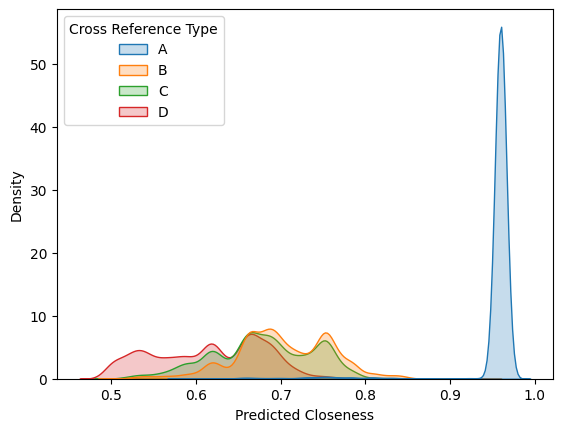

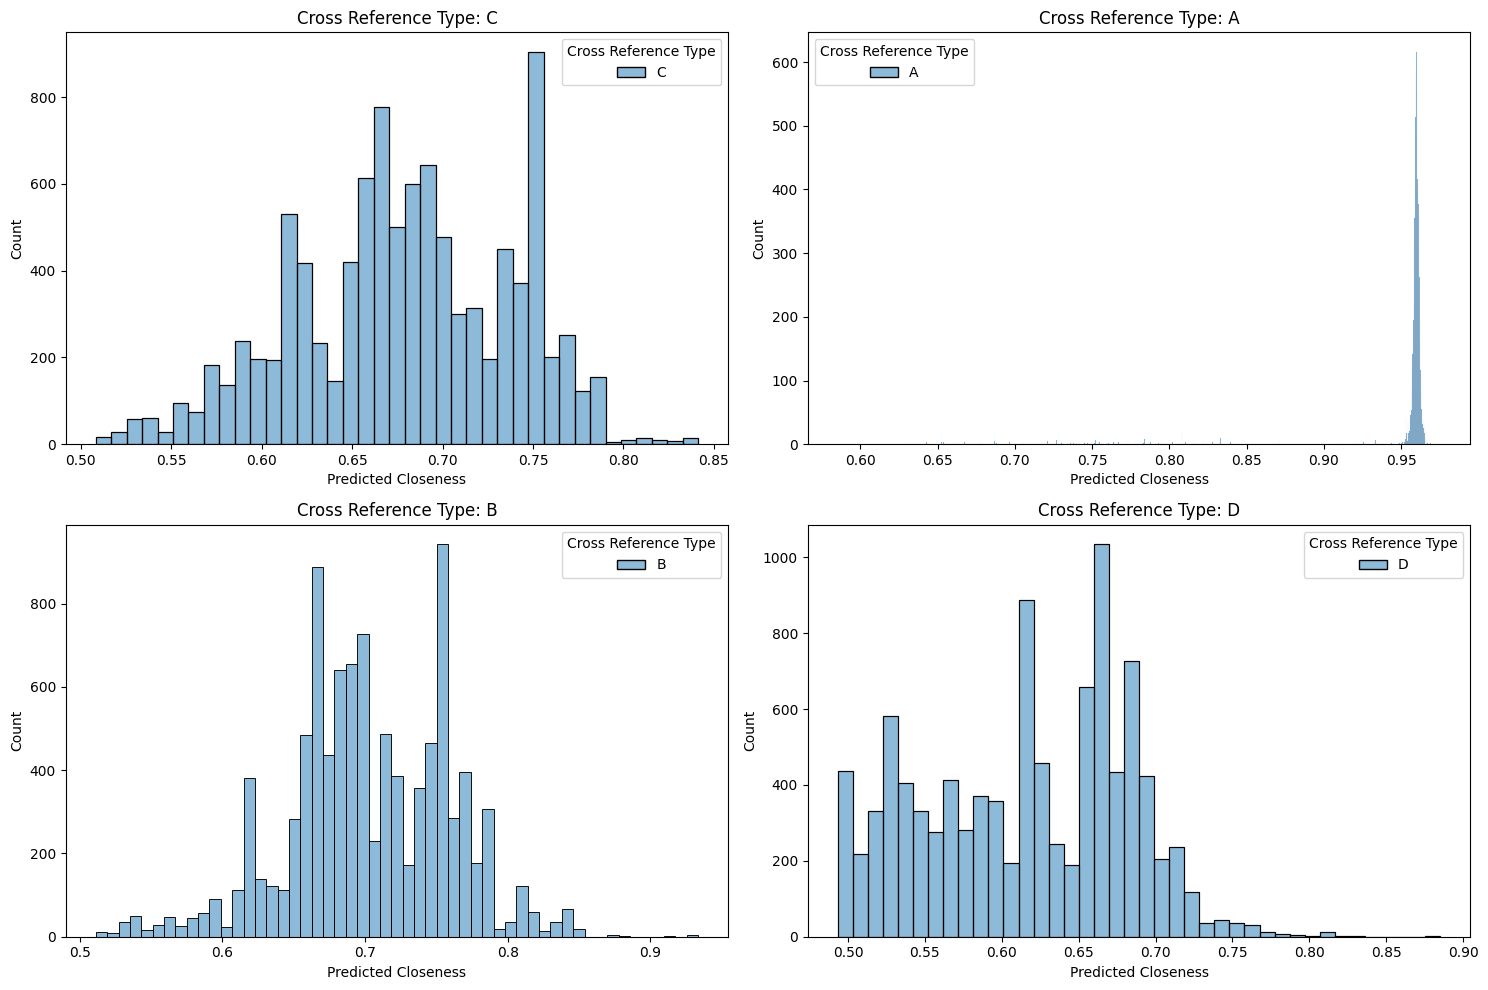

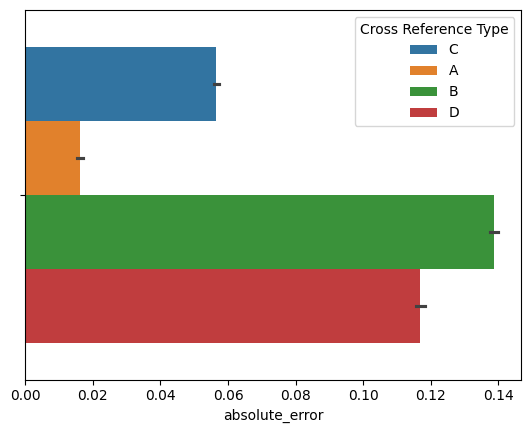

In [41]:
model_accuracy["Random Forest Regressor"]= test_model(rf_model)

In [43]:
from sklearn.ensemble import AdaBoostRegressor
# Create the pipeline
pipeline = Pipeline(steps=[
    ('regressor', AdaBoostRegressor(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'regressor__n_estimators': [500, 200],
    'regressor__learning_rate': [0.01, 0.001],
    "regressor__loss": ["linear", "square", "exponential"]
}
best ={'regressor__learning_rate': [0.01], 'regressor__loss': ['linear'], 'regressor__n_estimators': [200]}
# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, best, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best score
print("Best cross-validation MSE score:", -grid_search.best_score_)
AdaBoostRegressor_model = grid_search.best_estimator_
# Save the model
joblib.dump(grid_search.best_estimator_, 'adaboost_regressor_pipeline.pkl')

Best parameters: {'regressor__learning_rate': 0.01, 'regressor__loss': 'linear', 'regressor__n_estimators': 200}
Best cross-validation MSE score: 0.017616557563185746


['adaboost_regressor_pipeline.pkl']

Test MSE: 0.0178


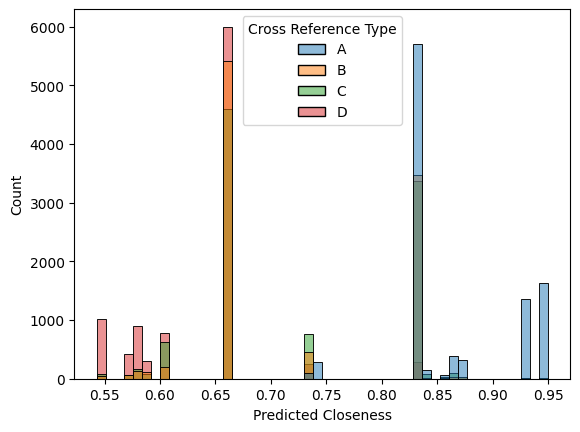

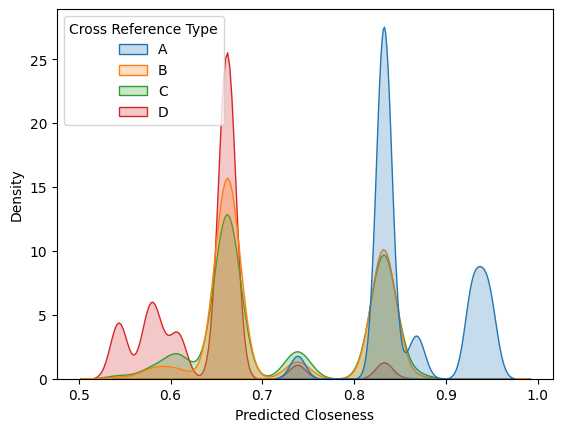

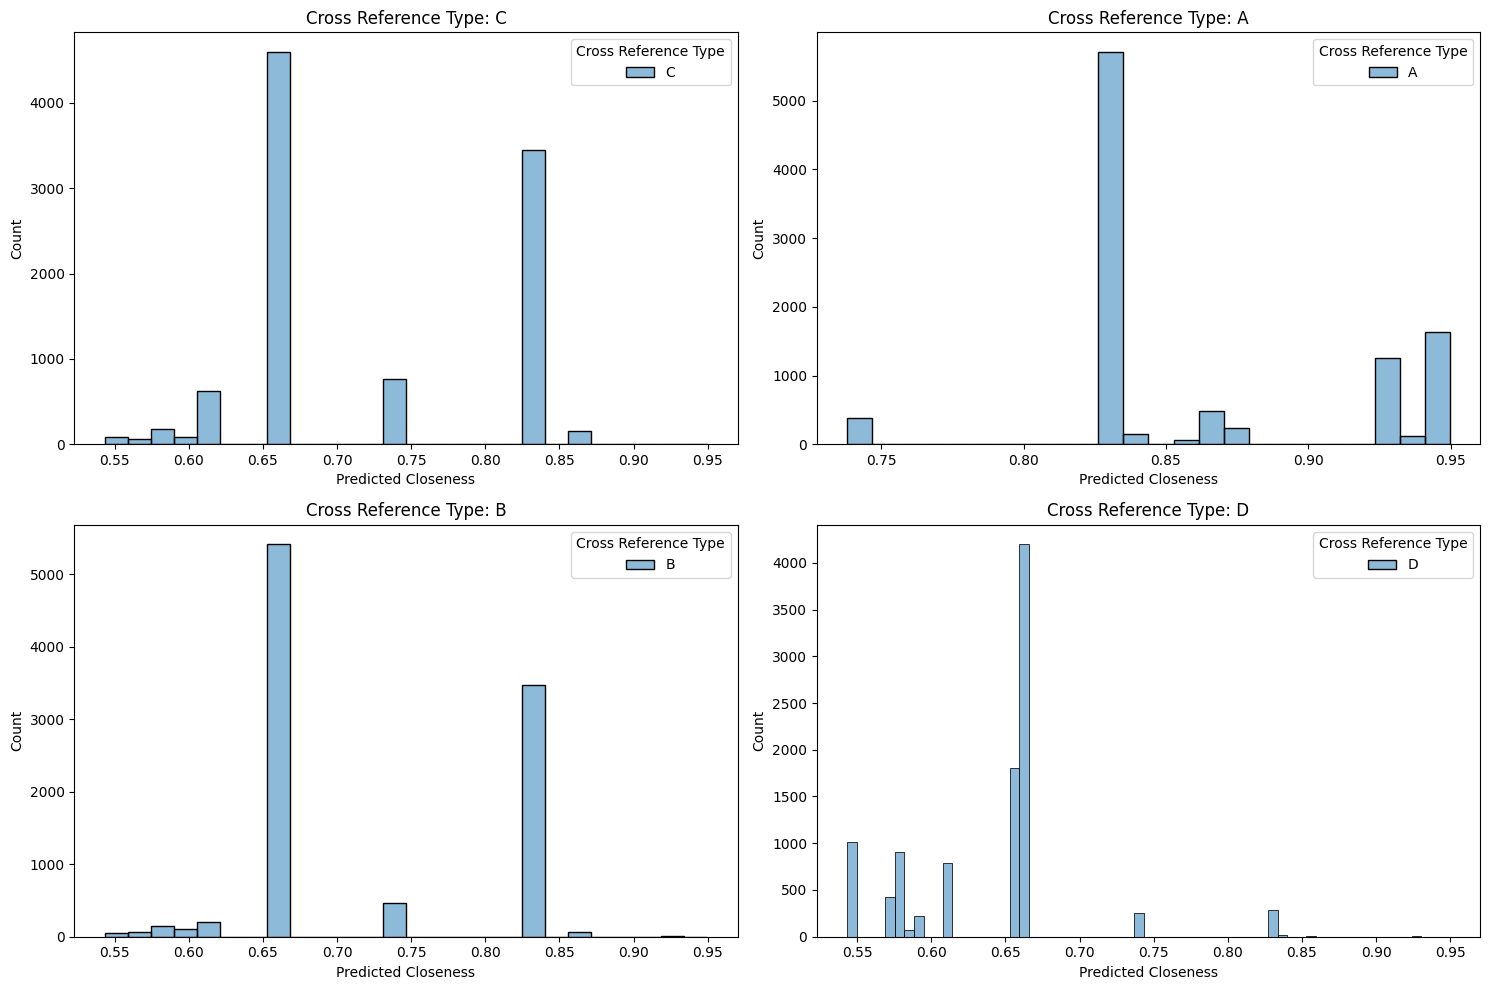

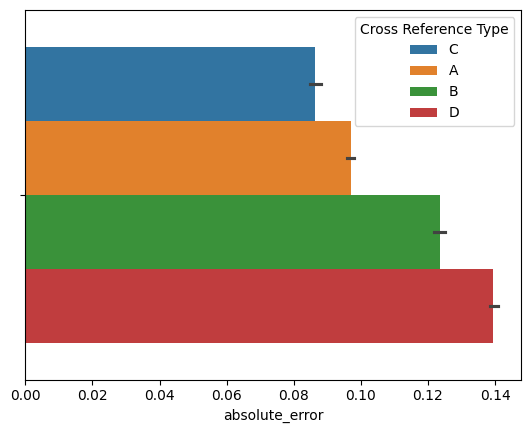

In [44]:
model_accuracy["AdaBoostRegressor"]= test_model(AdaBoostRegressor_model)

In [45]:

from sklearn.ensemble import GradientBoostingRegressor
# Create the pipeline
pipeline = Pipeline(steps=[
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.1, 0.01],
    'regressor__max_depth': [3, 5]
}

# Initialize GridSearchCV
best = {'regressor__learning_rate': [0.1], 'regressor__max_depth': [5], 'regressor__n_estimators': [200]}
grid_search = GridSearchCV(pipeline, best, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best score
print("Best cross-validation MSE score:", -grid_search.best_score_)
gradboost_model = grid_search.best_estimator_
# Save the model
joblib.dump(grid_search.best_estimator_, 'gradient_boosting_regressor_pipeline.pkl')

Best parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Best cross-validation MSE score: 0.012407345691071076


['gradient_boosting_regressor_pipeline.pkl']

Test MSE: 0.0125


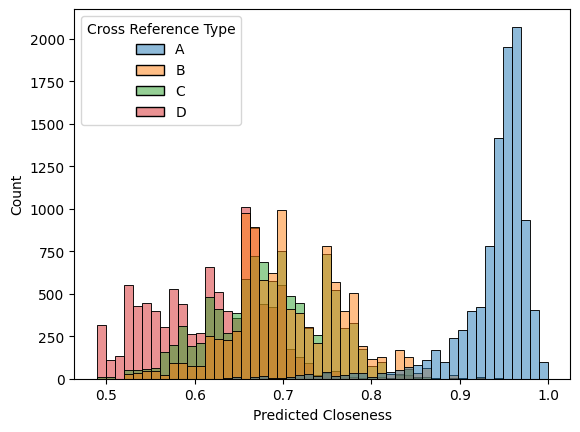

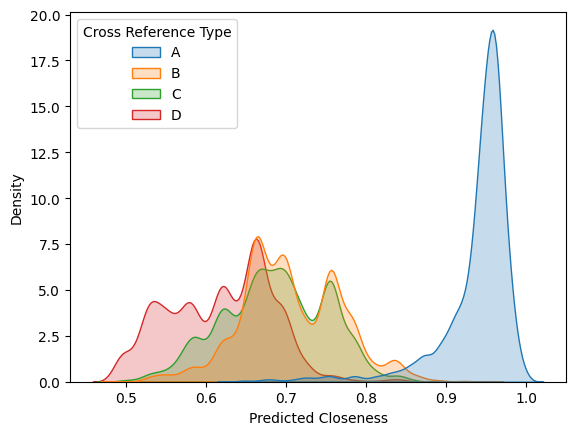

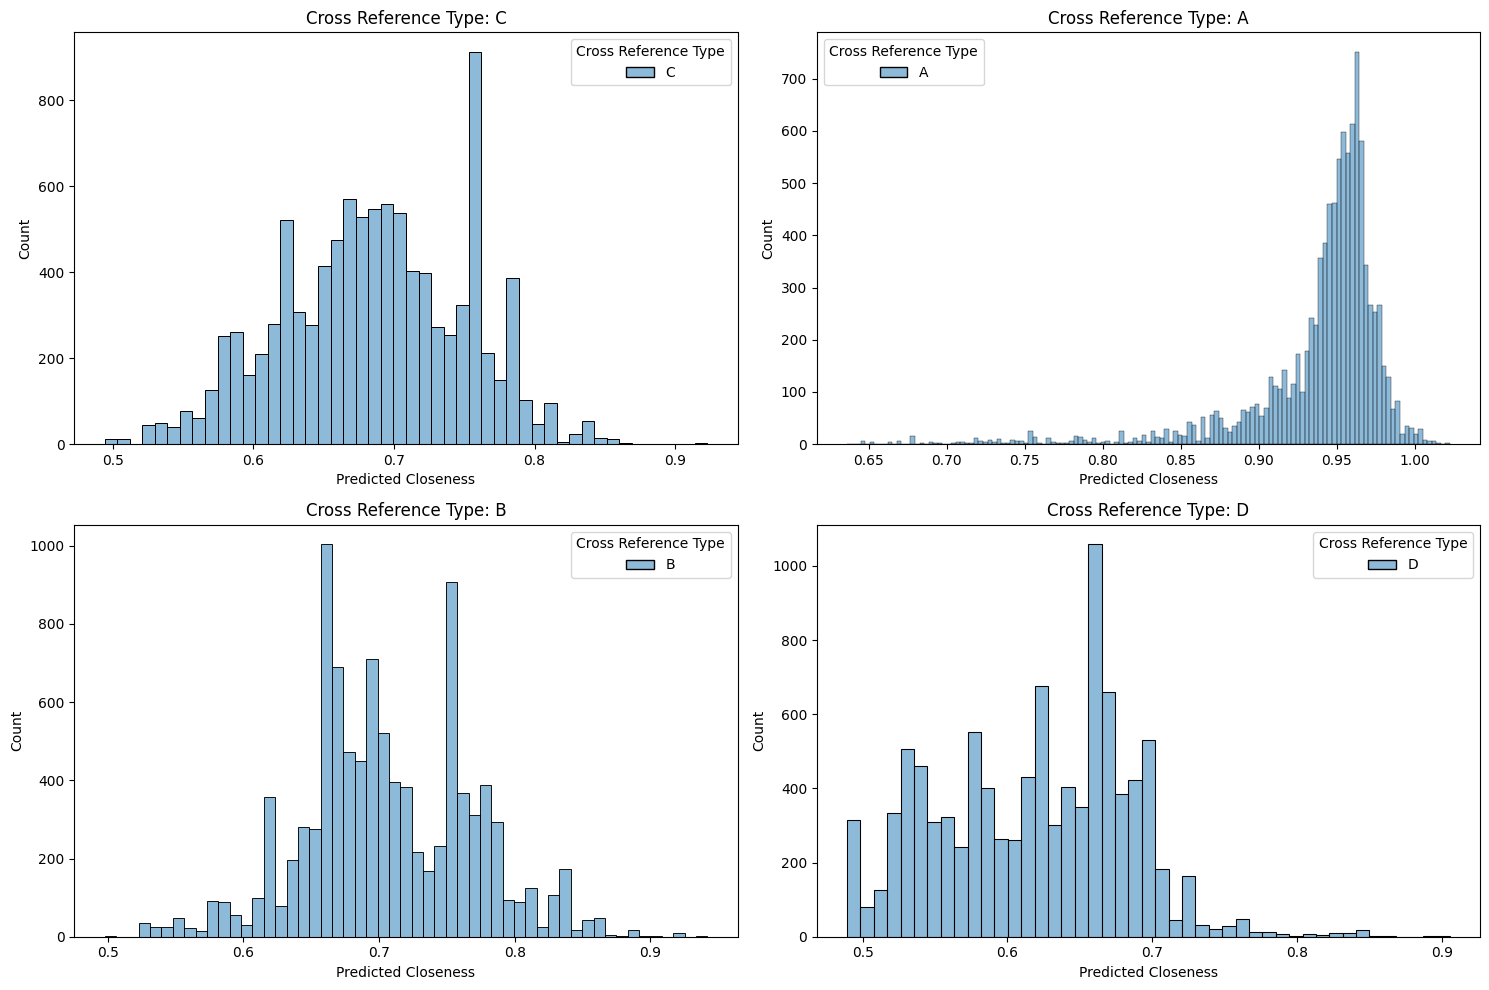

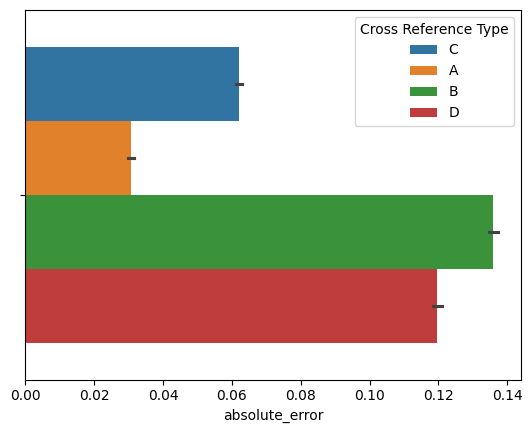

In [46]:
model_accuracy["gradient_boosting_regressor"]=test_model(gradboost_model)

In [193]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.6/124.9 MB 8.4 MB/s eta 0:00:15
   - -------------------------------------- 3.7/124.9 MB 9.5 MB/s eta 0:00:13
   - -------------------------------------- 6.0/124.9 MB 10.0 MB/s eta 0:00:12
   -- ------------------------------------- 8.7/124.9 MB 10.3 MB/s eta 0:00:12
   --- ------------------------------------ 10.7/124.9 MB 10.5 MB/s eta 0:00:11
   --- ------------------------------------ 12.1/124.9 MB 9.6 MB/s eta 0:00:12
   ---- ----------------------------------- 12.8/124.9 MB 8.8 MB/s eta 0:00:13
   ---- ----------------------------------- 13.9/124.9 MB 8.3 MB/s eta 0:00:14
   ---- ----------------------------------- 15.2/124.9 MB 8.1 MB/s eta 0:00:14
   ----- ---------------------------------- 17.0/124.9 MB 8.1 MB/s eta 0:00:14
   ------ --------------------------------- 19.1/124.9 MB 8.2 MB/s eta 0:00:13
   ------ --------------------------------- 21.2/124.9 MB 8.4

DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib
# Create the pipeline
pipeline = Pipeline(steps=[
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'regressor__n_estimators': [ 1000],
    'regressor__learning_rate': [0.5],
    'regressor__max_depth': [50]
}

# Initialize GridSearchCV
best = {'regressor__learning_rate': [0.5], 'regressor__max_depth': [50], 'regressor__n_estimators': [1000]}
grid_search = GridSearchCV(pipeline, best, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best score
print("Best cross-validation MSE score:", -grid_search.best_score_)

# Save the model
joblib.dump(grid_search.best_estimator_, 'xgb_regressor_pipeline.pkl')
xgb_model = grid_search.best_estimator_

Best parameters: {'regressor__learning_rate': 0.5, 'regressor__max_depth': 50, 'regressor__n_estimators': 1000}
Best cross-validation MSE score: 0.011892943995298283


Test MSE: 0.0120


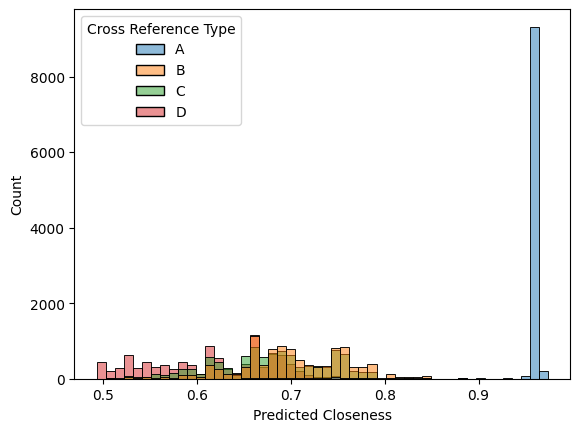

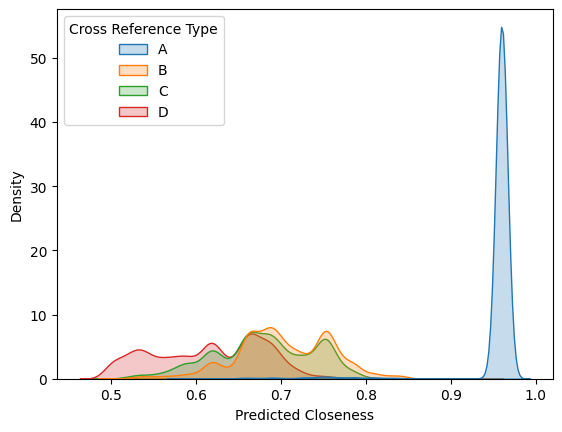

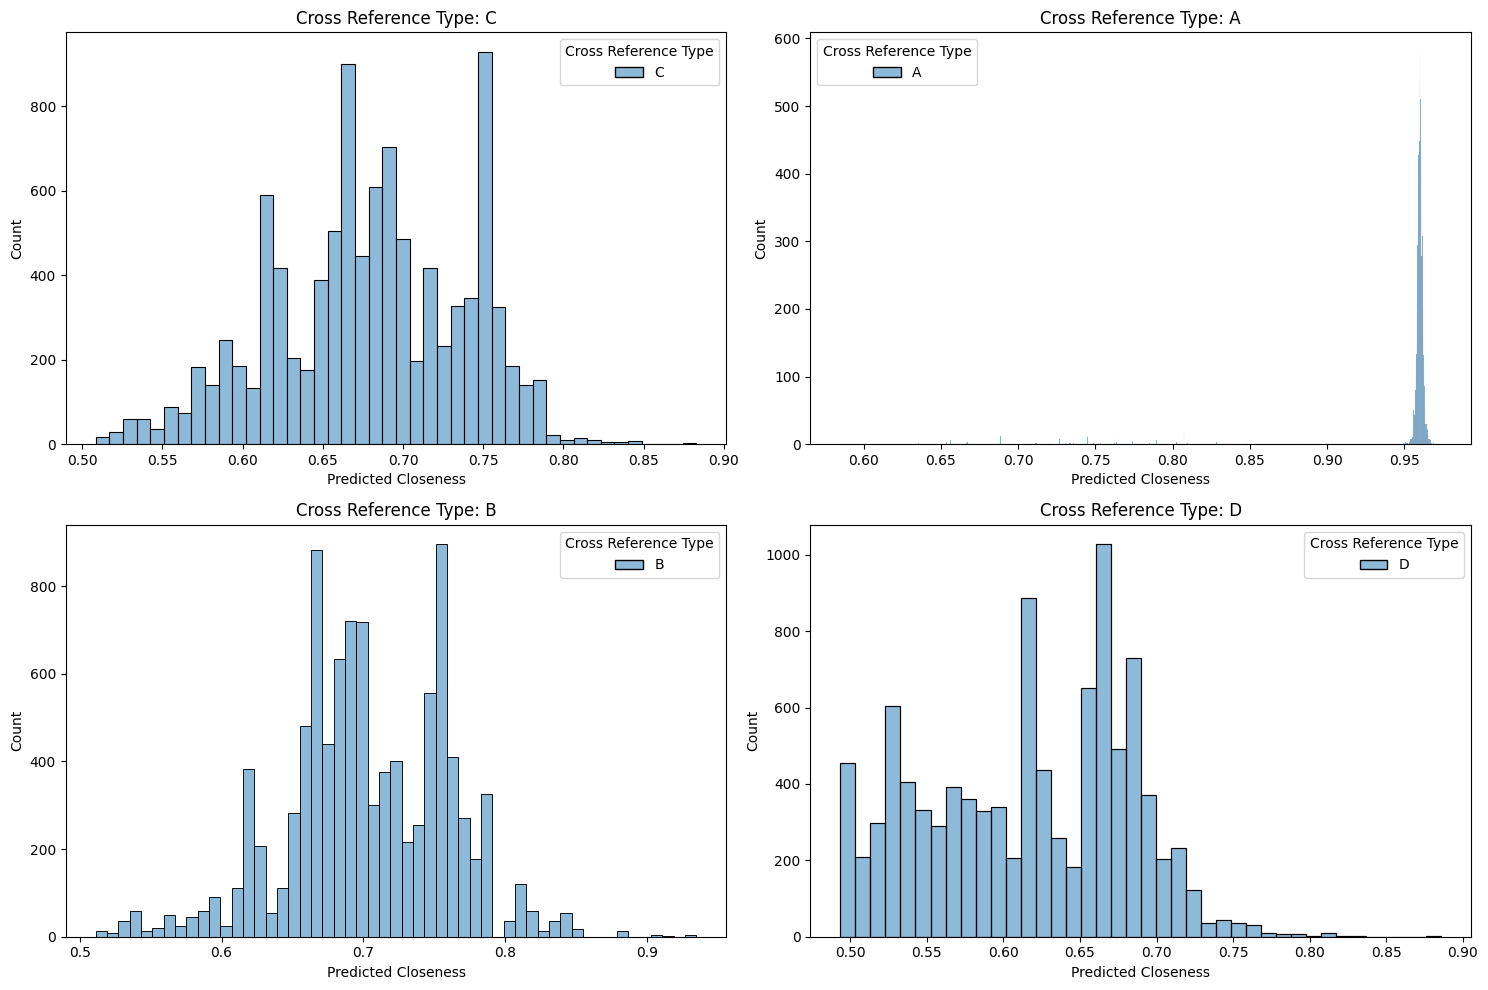

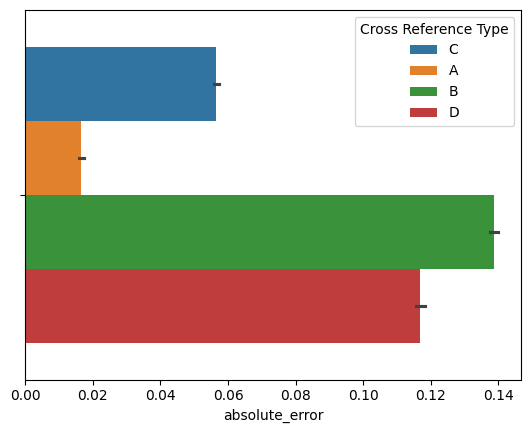

In [48]:
model_accuracy["XGBRegressor"]= test_model(xgb_model)

In [203]:
model_accuracy

{'Linear Regregression': 0.03018087912005369,
 'Random Forest Regressor': 0.014313888024964638,
 'AdaBoostRegressor': 0.02644455461469586,
 'gradient_boosting_regressor': 0.01508647014529688,
 'XGBRegressor': 0.014192651618599271}

In [49]:

from sklearn.svm import SVR


# Identify numerical and categorical columns


# Preprocessing for numerical data
# numerical_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# # Preprocessing for categorical data
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numer),
#         ('cat', categorical_transformer, categorical_cols)
#     ])

# Create the pipeline
pipeline = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Define hyperparameter grid
param_grid = {
    'regressor__C': [50],
    'regressor__epsilon': [0.1],
    'regressor__kernel': ['rbf']
}
best_parameters = {'regressor__C': [10], 'regressor__epsilon': [0.1], 'regressor__kernel': ['rbf']}
# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best score
print("Best cross-validation R2 score:", grid_search.best_score_)
svr_model = grid_search.best_estimator_
# Save the model
joblib.dump(grid_search.best_estimator_, 'svr_pipeline.pkl')

KeyboardInterrupt: 

In [ ]:
model_accuracy["SVR"]= test_model(svr_model)

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib

# Create the pipeline
pipeline = Pipeline(steps=[
    ('regressor', KNeighborsRegressor())
])

# Define hyperparameter grid
param_grid = {
    'regressor__n_neighbors': [5, 10, 15],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
grid_search = grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best score
print("Best cross-validation MSE score:", -grid_search.best_score_)

# Save the model
joblib.dump(grid_search.best_estimator_, 'knn_regressor_pipeline.pkl')
knn_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'regressor__metric': 'manhattan', 'regressor__n_neighbors': 15, 'regressor__weights': 'distance'}
Best cross-validation MSE score: 0.012655664503318103


Test MSE: 0.0128


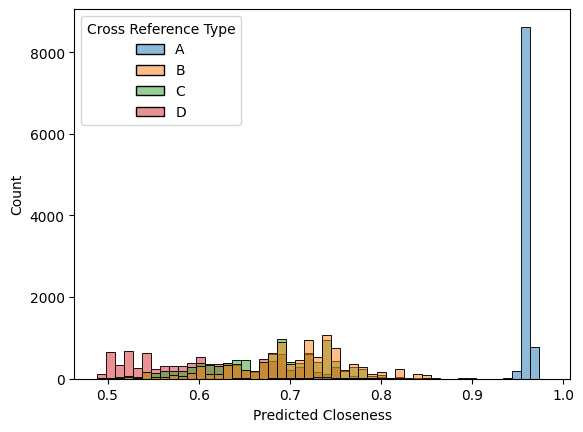

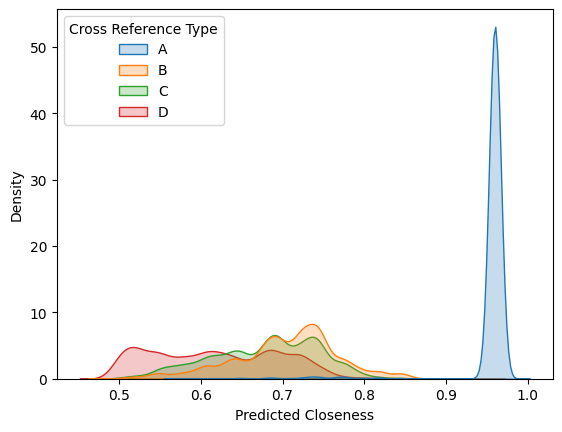

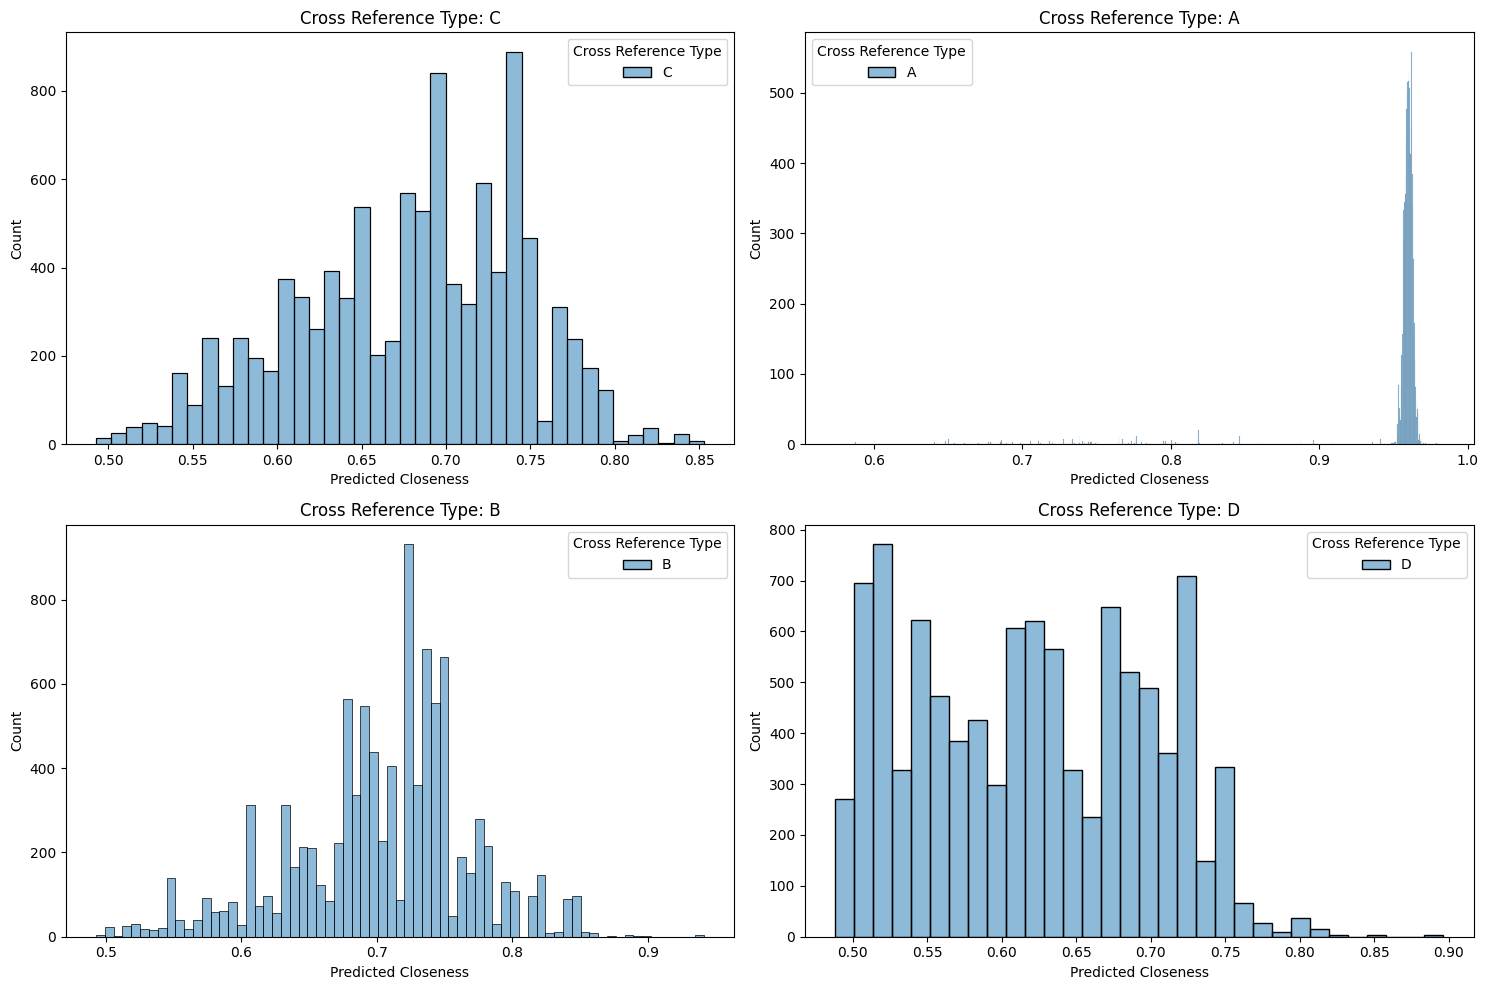

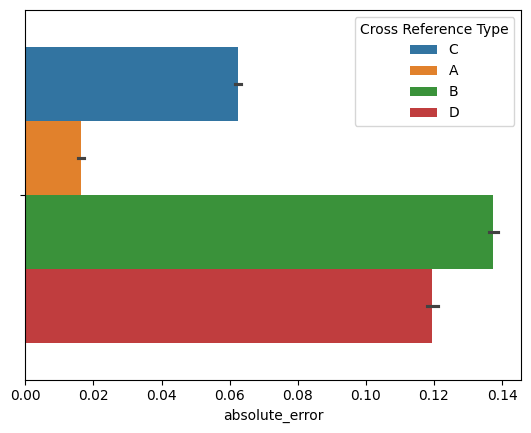

In [52]:
model_accuracy["KNeighborsRegressor_15"]= test_model(grid_search.best_estimator_)

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
# Prepare datasets
train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32),
                              torch.tensor(y_train.values, dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32),
                            torch.tensor(y_test.values, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32),
                             torch.tensor(y_test.values, dtype=torch.float32))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define the model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        
        # Initial layer
        self.input_layer = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        
        # Residual blocks
        self.res_block1 = ResidualBlock(256, 256)
        self.res_block2 = ResidualBlock(256, 128)
        self.res_block3 = ResidualBlock(128, 64)
        
        # Final layers
        self.final_layers = nn.Sequential(
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.res_block1(x)
        x = self.res_block2(x)
        x = self.res_block3(x)
        return self.final_layers(x)

class ResidualBlock(nn.Module):
    def __init__(self, in_features, out_features):
        super(ResidualBlock, self).__init__()
        
        self.block = nn.Sequential(
            nn.Linear(in_features, out_features),
            nn.BatchNorm1d(out_features),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(out_features, out_features),
            nn.BatchNorm1d(out_features)
        )
        
        # Skip connection if input and output dimensions differ
        self.skip = nn.Linear(in_features, out_features) if in_features != out_features else nn.Identity()
        self.relu = nn.ReLU()
        
    def forward(self, x):
        identity = self.skip(x)
        out = self.block(x)
        out += identity
        return self.relu(out)

model = RegressionModel(X_train.shape[1])
model.to(device)
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=3)
num_epochs = 12
# Training loop
for epoch in range(num_epochs):
    model.train()
    
    for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_val_batch, y_val_batch in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            val_outputs = model(X_val_batch).squeeze()
            val_loss += criterion(val_outputs, y_val_batch).item()
    val_loss /= len(val_loader)
    scheduler.step(val_loss)
    print(f'Epoch {epoch+1}, Validation Loss: {val_loss}')

# Evaluation on test set
model.eval()
test_loss = 0
with torch.no_grad():
    for X_test_batch, y_test_batch in tqdm(test_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Test"):
        X_test_batch, y_test_batch = X_test_batch.to(device), y_test_batch.to(device)
        test_outputs = model(X_test_batch).squeeze()
        test_loss += criterion(test_outputs, y_test_batch).item()
test_loss /= len(test_loader)
print(f'Test MSE: {test_loss}')

Epoch 1/12 - Training:   0%|          | 0/11250 [00:00<?, ?it/s]

Epoch 1/12 - Validation: 100%|██████████| 1250/1250 [00:04<00:00, 311.91it/s]


Epoch 1, Validation Loss: 0.017408611695468427


Epoch 2/12 - Validation: 100%|██████████| 1250/1250 [00:04<00:00, 285.53it/s]


Epoch 2, Validation Loss: 0.016629050649702548


Epoch 3/12 - Validation: 100%|██████████| 1250/1250 [00:04<00:00, 270.46it/s]


Epoch 3, Validation Loss: 0.016260245059803127


Epoch 4/12 - Validation: 100%|██████████| 1250/1250 [00:05<00:00, 226.92it/s]


Epoch 4, Validation Loss: 0.01615698815062642


Epoch 5/12 - Validation: 100%|██████████| 1250/1250 [00:04<00:00, 263.89it/s]


Epoch 5, Validation Loss: 0.016048454501479865


Epoch 6/12 - Validation: 100%|██████████| 1250/1250 [00:04<00:00, 271.02it/s]


Epoch 6, Validation Loss: 0.015980314511805774


Epoch 7/12 - Validation: 100%|██████████| 1250/1250 [00:04<00:00, 252.44it/s]


Epoch 7, Validation Loss: 0.015942275809496642


Epoch 8/12 - Validation: 100%|██████████| 1250/1250 [00:04<00:00, 276.01it/s]


Epoch 8, Validation Loss: 0.015923853877931833


Epoch 9/12 - Validation: 100%|██████████| 1250/1250 [00:04<00:00, 268.09it/s]


Epoch 9, Validation Loss: 0.01570598839893937


Epoch 10/12 - Validation: 100%|██████████| 1250/1250 [00:04<00:00, 271.59it/s]


Epoch 10, Validation Loss: 0.017340189760550857


Epoch 11/12 - Validation: 100%|██████████| 1250/1250 [00:04<00:00, 250.35it/s]


Epoch 11, Validation Loss: 0.01662720130980015


Epoch 12/12 - Validation: 100%|██████████| 1250/1250 [00:05<00:00, 242.12it/s]


Epoch 12, Validation Loss: 0.015543940181285142


Epoch 12/12 - Test: 100%|██████████| 1250/1250 [00:05<00:00, 249.23it/s]

Test MSE: 0.015543940181285142


In [61]:
def test_model(model, dataloader, df_test, device):
    df = df_test.copy()
    model.eval()  # Set model to evaluation mode
    predictions = []
    targets = []
    with torch.no_grad():  # Disable gradient computation
        for x,y in tqdm(dataloader, desc="Testing"):
            # Move data to the specified device
            x = x.to(device)
            y = y.to(device)

            # Forward pass
            output = model(x)

            # Collect predictions and targets
            predictions.append(output.cpu().numpy())
            targets.append(y.cpu().numpy())

    # Concatenate all batches
    y_pred = np.vstack(predictions).flatten()
    y_true = np.vstack(targets).flatten()
    df["Predicted Closeness"] = y_pred
    df["absolute_error"] = np.abs(df["Closeness"] - df["Predicted Closeness"])
    mse = mean_squared_error(y_true, y_pred)
    print(f"Test MSE: {mse:.4f}")

    hue_order = sorted(df["Cross Reference Type"].unique())
    sns.histplot(df[df["Predicted Closeness"] <= 1], x='Predicted Closeness', hue='Cross Reference Type', bins=50, hue_order=hue_order)
    plt.xlim(0, 1)
    plt.show()

    sns.kdeplot(df[df["Predicted Closeness"] <= 1], x='Predicted Closeness', hue='Cross Reference Type', fill=True, common_norm=False, hue_order=hue_order)
    plt.xlim(0, 1)
    plt.show()

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    cross_reference_types = df["Cross Reference Type"].unique()

    for ax, ctype in zip(axes.flatten(), cross_reference_types):
        sns.histplot(df[df["Cross Reference Type"] == ctype], x='Predicted Closeness', hue='Cross Reference Type', ax=ax)
        ax.set_title(f'Cross Reference Type: {ctype}')
        ax.set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

    sns.barplot(data=df, hue='Cross Reference Type', x='absolute_error')
    
    plt.show()
    return mse


Testing: 100%|██████████| 1250/1250 [00:05<00:00, 247.64it/s]


Test MSE: 0.0155


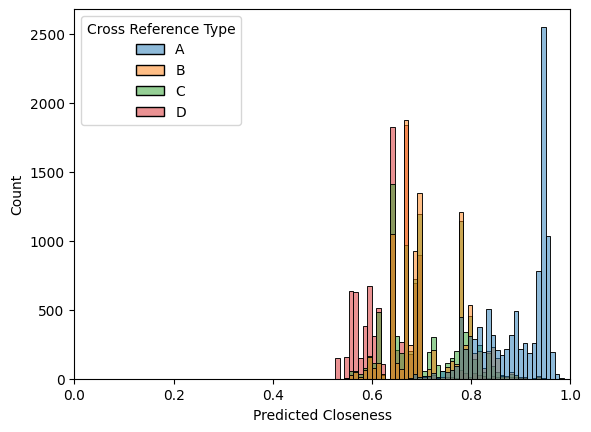

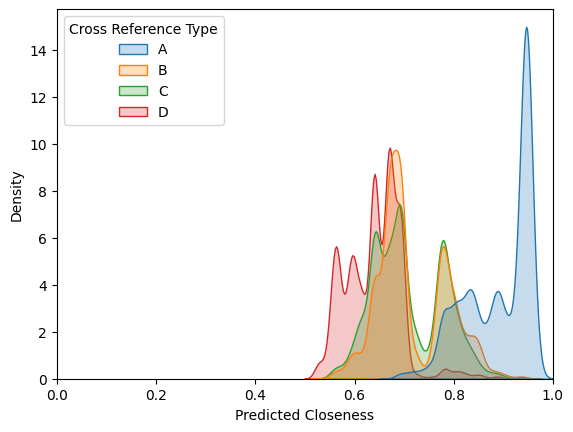

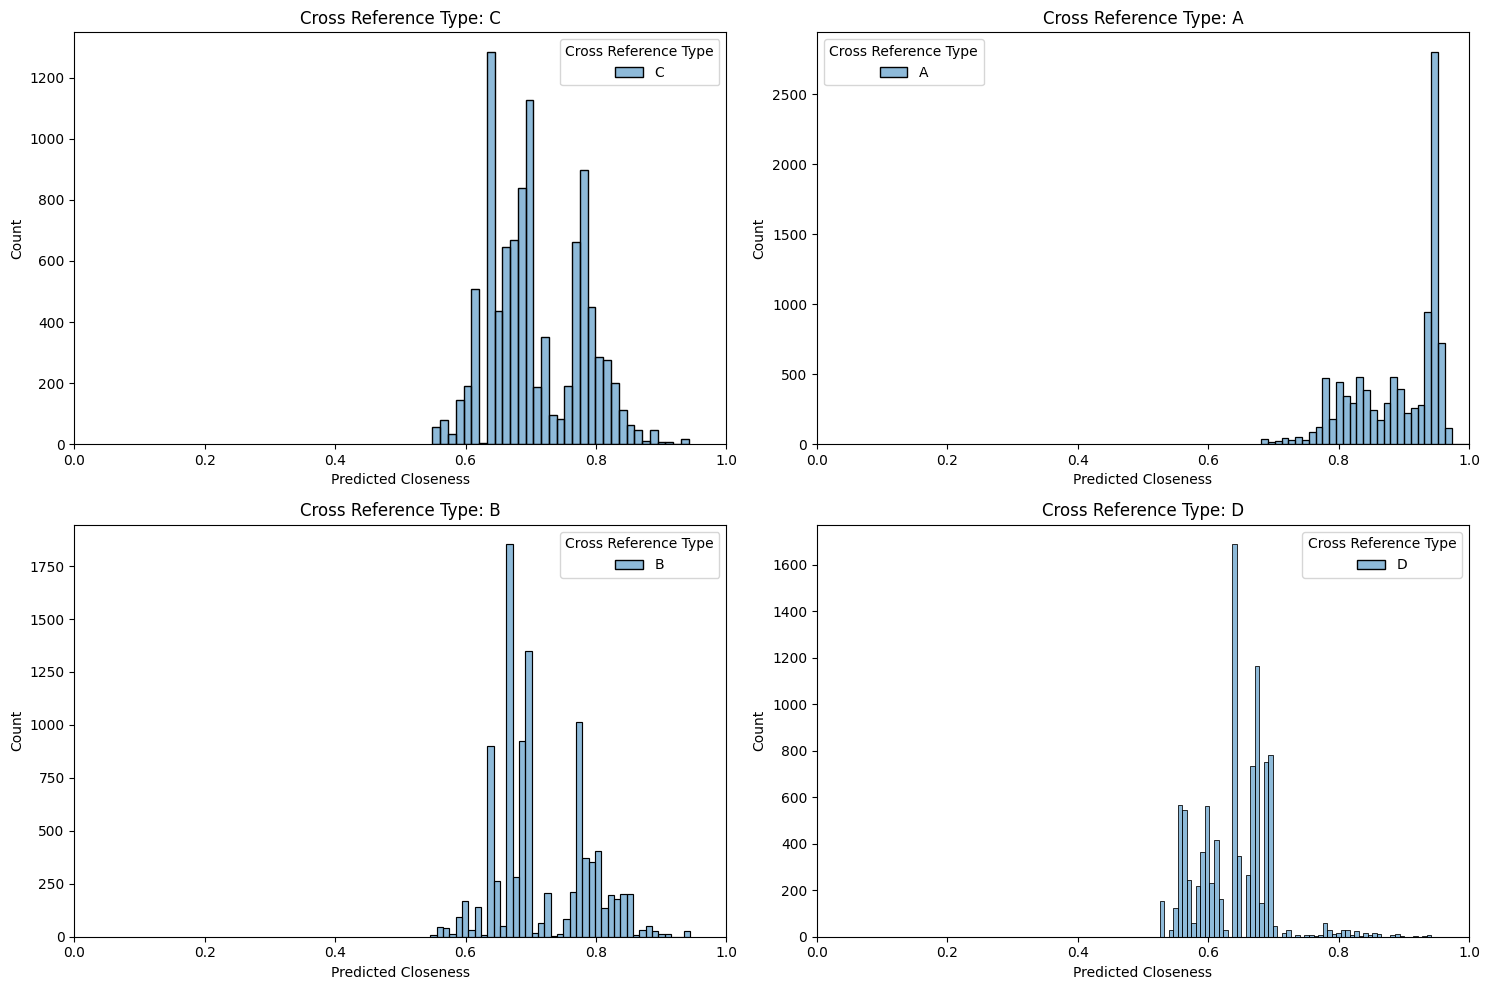

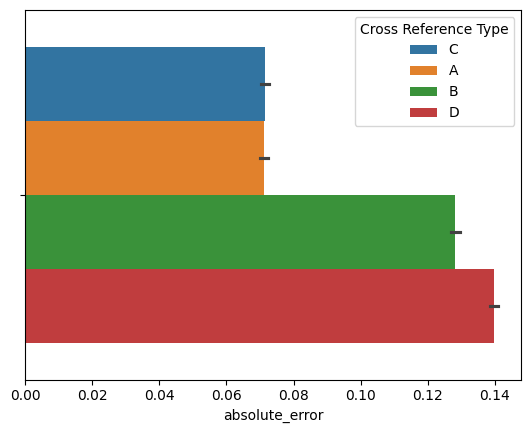

In [62]:
model_accuracy["Neural Network"]= test_model(model, test_loader, df_test, device)

C:\Users\adamg\AppData\Local\Temp\ipykernel_17588\3376170324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=model_accuracy.values(), x=model_accuracy.keys(),palette="viridis")


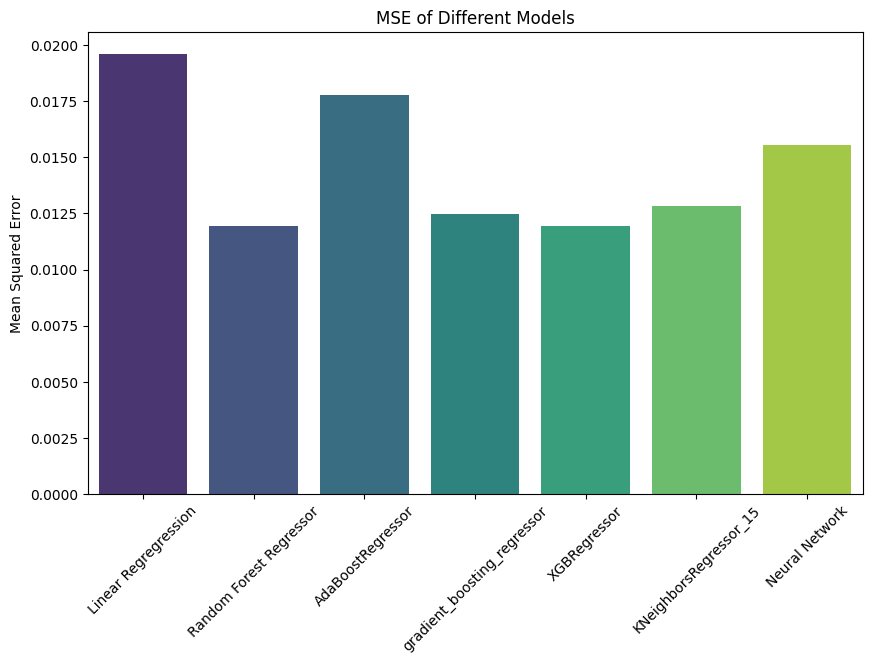

In [63]:
model_accuracy
plt.figure(figsize=(10, 6))
sns.barplot(y=model_accuracy.values(), x=model_accuracy.keys(),palette="viridis")
plt.title('MSE of Different Models')
plt.xticks(rotation=45)
plt.ylabel('Mean Squared Error')
plt.show()

In [65]:
test = df_sampled.sample(n=30000,random_state=42)
test["predicted Closeness"]=grid_search.best_estimator_.predict(test[columns_diff])
test["error"]=np.abs(test["Closeness"]-test["predicted Closeness"])
test.head()

Cross Reference Type         MPN MANUFACTURER  \
2102                     B   PN-103477      MN-1030   
28239                    B  PN-1017532      MN-1030   
3                        A  PN-1017594      MN-1030   
8669                     B  PN-1018060      MN-1030   
26860                    B   PN-103484      MN-1030   

       Maximum Input Offset Voltage  Maximum Single Supply Voltage  \
2102                       0.001750                       0.478261   
28239                      0.000750                       0.060870   
3                          0.000500                       0.478261   
8669                       0.001125                       0.052174   
26860                      0.001750                       0.478261   

       Minimum Single Supply Voltage  Number of Channels per Chip  \
2102                        0.153094                     0.333333   
28239                       0.074919                     0.000000   
3                           0.153094                     0.000000   
8669                        0.120521                     0.333333   
26860                       0.153094                     0.333333   

      Supplier_Package  Typical Gain Bandwidth Product    MPN_comp  ...  \
2102              SO N                        0.000137   PN-103458  ...   
28239           SOT-23                        0.000082  PN-1014377  ...   
3               SOT-23                        0.000100  PN-1017598  ...   
8669              MSOP                        0.002500   PN-109086  ...   
26860             SO N                        0.000137  PN-1018212  ...   

          Std  Closeness  Maximum Input Offset Voltage_diff  \
2102   0.0249   0.829508                           0.000000   
28239  0.0249   0.833472                           0.000125   
3      0.0107   0.941775                           0.000500   
8669   0.0249   0.826799                           0.000750   
26860  0.0249   0.838602                           0.000500   

       Maximum Single Supply Voltage_diff  Minimum Single Supply Voltage_diff  \
2102                             0.104348                            0.000000   
28239                            0.008696                            0.019544   
3                                0.000000                            0.000000   
8669                             0.017391                            0.013029   
26860                            0.034783                            0.000000   

      Number of Channels per Chip_diff  Typical Gain Bandwidth Product_diff  \
2102                               0.0                             0.000050   
28239                              0.0                             0.000020   
3                                  0.0                             0.000000   
8669                               0.0                             0.000625   
26860                              0.0                             0.005881   

       Supplier_Package_diff  predicted Closeness     error  
2102                       0             0.719841  0.109667  
28239                      1             0.811192  0.022280  
3                          1             0.872416  0.069359  
8669                       0             0.715679  0.111120  
26860                      0             0.714150  0.124452  

[5 rows x 28 columns]

<Axes: xlabel='predicted Closeness', ylabel='Count'>

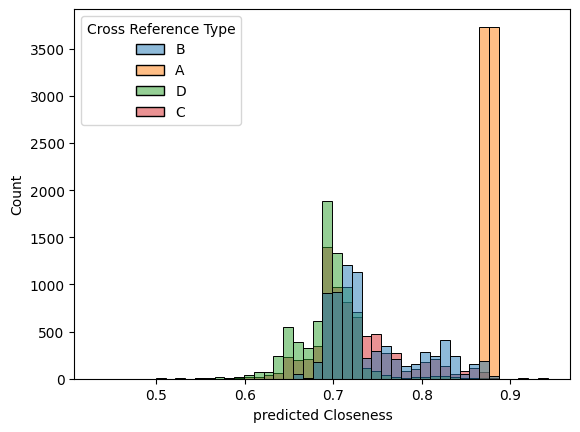

In [66]:
sns.histplot(test,x="predicted Closeness",hue="Cross Reference Type")


<Axes: xlabel='error'>

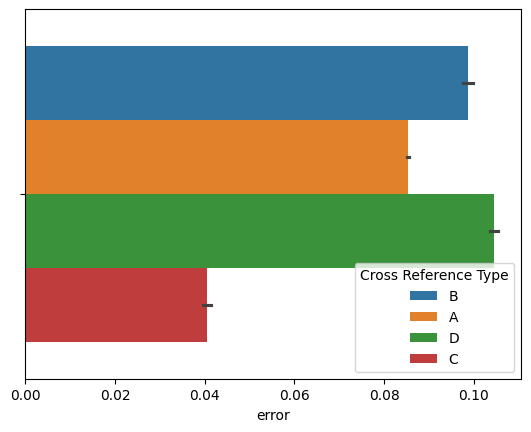

In [67]:
sns.barplot(test,x="error",hue="Cross Reference Type")

In [68]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

In [73]:
main_features = numerical_columns + categorical_columns
comp_features = [col + '_comp' for col in numerical_columns] + [col + '_comp' for col in categorical_columns]


In [77]:
df_sampled.columns

Index(['Cross Reference Type', 'MPN', 'MANUFACTURER',
       'Maximum Input Offset Voltage', 'Maximum Single Supply Voltage',
       'Minimum Single Supply Voltage', 'Number of Channels per Chip',
       'Supplier_Package', 'Typical Gain Bandwidth Product', 'MPN_comp',
       'MANUFACTURER_comp', 'Maximum Input Offset Voltage_comp',
       'Maximum Single Supply Voltage_comp',
       'Minimum Single Supply Voltage_comp',
       'Number of Channels per Chip_comp', 'Supplier_Package_comp',
       'Typical Gain Bandwidth Product_comp', 'Mean', 'Std', 'Closeness',
       'Maximum Input Offset Voltage_diff',
       'Maximum Single Supply Voltage_diff',
       'Minimum Single Supply Voltage_diff',
       'Number of Channels per Chip_diff',
       'Typical Gain Bandwidth Product_diff', 'Supplier_Package_diff'],
      dtype='object')

In [101]:
import torch

print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Version: {torch.version.cuda}")
print(f"CUDA Available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")

PyTorch Version: 2.2.2+cpu
CUDA Version: None
CUDA Available: False
